<a href="https://colab.research.google.com/github/Calvince1/Cal/blob/main/149481_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")


Loading and Reading JSON files

In [2]:
#Portfolio dataset
file_path = '/content/drive/MyDrive/General/JSON folder/portfolio.json'
# Initializing an empty list to store individual JSON objects
json_objects = []
# Reading the JSON file line by line and load each line as a JSON object
with open(file_path, 'r') as json_file:
    for line in json_file:
        try:
            json_data = json.loads(line)
            json_objects.append(json_data)
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON: {e}")

# Converting the list of JSON objects into a DataFrame
portfolio = pd.DataFrame(json_objects)

portfolio.head(10)

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7.0,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5.0,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4.0,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7.0,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10.0,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7.0,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10.0,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3.0,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5.0,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7.0,discount,2906b810c7d4411798c6938adc9daaa5


In [3]:
file_path = '/content/drive/MyDrive/General/JSON folder/profile.json'
# Initialize an empty list to store individual JSON objects
json_objects = []
# Reading the JSON file line by line and load each line as a JSON object
with open(file_path, 'r') as json_file:
    for line in json_file:
        try:
            json_data = json.loads(line)
            json_objects.append(json_data)
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON: {e}")

# Converting the list of JSON objects into a DataFrame
profile = pd.DataFrame(json_objects)
profile.head(10)

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
5,M,68,e2127556f4f64592b11af22de27a7932,20180426,70000.0
6,None,118,8ec6ce2a7e7949b1bf142def7d0e0586,20170925,NaN
7,None,118,68617ca6246f4fbc85e91a2a49552598,20171002,NaN
8,M,65,389bc3fa690240e798340f5a15918d5c,20180209,53000.0
9,None,118,8974fc5686fe429db53ddde067b88302,20161122,NaN


In [4]:
age_bins = [0, 26, 36, 46, 56, 66, 76, 86, 150]
age_labels = ['18-25ys', '26-35ys', '36-45ys', '46-55ys', '56-65ys', '66-75ys', '76-85ys', '> 86ys']

# Create age_group column
profile['age_group'] = pd.cut(profile['age'], bins=age_bins, labels=age_labels)

In [5]:
# Create a new column `income_group`
income_group = pd.cut(profile['income'],
      bins = [profile['income'].min(), 45000, 60000, 75000, 90000, 105000, profile['income'].max()],
      labels = ['30-45k', '45-60k', '60-75k', '75-90k', '90-105k', '> 105k'])
profile['income_group'] = income_group

In [6]:
profile.head(10)

,gender,age,id,became_member_on,income,age_group,income_group
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN,> 86ys,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,46-55ys,> 105k
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN,> 86ys,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0,66-75ys,90-105k
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN,> 86ys,NaN
5,M,68,e2127556f4f64592b11af22de27a7932,20180426,70000.0,66-75ys,60-75k
6,None,118,8ec6ce2a7e7949b1bf142def7d0e0586,20170925,NaN,> 86ys,NaN
7,None,118,68617ca6246f4fbc85e91a2a49552598,20171002,NaN,> 86ys,NaN
8,M,65,389bc3fa690240e798340f5a15918d5c,20180209,53000.0,56-65ys,45-60k
9,None,118,8974fc5686fe429db53ddde067b88302,20161122,NaN,> 86ys,NaN


In [7]:
missing_gender = profile[profile['gender'].isna()]
missing_income = profile[profile['income'].isna()]
np.sum(missing_gender['id'] == missing_income['id'])

2175

In [8]:
#Loading the data on transactions

file_path = '/content/drive/MyDrive/General/JSON folder/transcript.json'

# Initialize an empty list to store individual JSON objects
json_objects = []

# Reading the JSON file line by line and load each line as a JSON object
with open(file_path, 'r') as json_file:
    for line in json_file:
        try:
            json_data = json.loads(line)
            json_objects.append(json_data)
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON: {e}")

# Converting the list of JSON objects into a DataFrame
transcript = pd.DataFrame(json_objects)
transcript.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


The Value column is a dictionary that needs to be normalised or flatted for effective analysis in the dataframe. The project will use json_noemalise tool

In [9]:
# Use json_normalize to create columns based on the keys in 'value' column
df_norm = pd.json_normalize(transcript['value'])

# merging the original DataFrame with the normalized one
transaction = pd.concat([transcript, df_norm], axis=1)
transaction.head()

,person,event,value,time,offer id,amount,offer_id,reward
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN,NaN
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,NaN,NaN
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0,2906b810c7d4411798c6938adc9daaa5,NaN,NaN,NaN
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0,fafdcd668e3743c1bb461111dcafc2a4,NaN,NaN,NaN
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,NaN,NaN


In [10]:
#offer id has two columns (written differently), merge the columns with the appropriate values
# Replace NaN values in 'offer_id' with values from 'offer id'
transaction['offer_id'] = transaction['offer_id'].combine_first(transaction['offer id'])

In [11]:
#Droping extra columns
transaction = transaction.drop(['value', 'offer id'], axis=1)
#Review the data
transaction.head()


,person,event,time,amount,offer_id,reward
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN
2,e2127556f4f64592b11af22de27a7932,offer received,0,NaN,2906b810c7d4411798c6938adc9daaa5,NaN
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,NaN,fafdcd668e3743c1bb461111dcafc2a4,NaN
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN


Merging the three datasets (Portfolio data, Profile data and the Transaction data) into one dataset. The Primary dataset is the transaction dataset

In [12]:
#Merge the transactions and portfolio data
trans_port = pd.merge(transaction, portfolio, how='left', left_on='offer_id', right_on='id', suffixes=('_transaction', '_portfolio'))
trans_port.shape

(306534, 12)

In [13]:
#Merging the trans_port and profile data into one business_data
business_data = pd.merge(trans_port, profile, how='left', left_on='person', right_on='id', suffixes=('_merged', '_profile'))
business_data.head()

,person,event,time,amount,offer_id,reward_transaction,reward_portfolio,channels,difficulty,duration,offer_type,id_merged,gender,age,id_profile,became_member_on,income,age_group,income_group
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,5.0,"[web, email, mobile]",5.0,7.0,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0,66-75ys,90-105k
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,5.0,"[web, email]",20.0,10.0,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN,> 86ys,NaN
2,e2127556f4f64592b11af22de27a7932,offer received,0,NaN,2906b810c7d4411798c6938adc9daaa5,NaN,2.0,"[web, email, mobile]",10.0,7.0,discount,2906b810c7d4411798c6938adc9daaa5,M,68,e2127556f4f64592b11af22de27a7932,20180426,70000.0,66-75ys,60-75k
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,NaN,fafdcd668e3743c1bb461111dcafc2a4,NaN,2.0,"[web, email, mobile, social]",10.0,10.0,discount,fafdcd668e3743c1bb461111dcafc2a4,None,118,8ec6ce2a7e7949b1bf142def7d0e0586,20170925,NaN,> 86ys,NaN
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,10.0,"[web, email, mobile, social]",10.0,5.0,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,None,118,68617ca6246f4fbc85e91a2a49552598,20171002,NaN,> 86ys,NaN


**Data Cleaning**

In [14]:
#Rename columns in the merged dataset
business_data = business_data.rename(columns={'person': 'customer_id'})

In [15]:
# Dropping duplicated columns
business_data = business_data.drop(['id_merged', 'id_profile'], axis=1)
business_data.shape

(306534, 17)

In [16]:
#Check if the true values in reward_transaction and reward_portfolio are identical and concat
def are_columns_matching(business_data, reward_transaction, reward_portfolio):
    # Filter out rows where both values are non-null
    non_null_rows = business_data.dropna(subset=[reward_transaction, reward_portfolio])

    # Check if the values in both columns are the same
    matching_values = non_null_rows[reward_transaction] == non_null_rows[reward_portfolio]

    # Check if all values are matching
    result = matching_values.all()

    return result

# Example usage
result = are_columns_matching(business_data, 'reward_transaction', 'reward_portfolio')
print(result)

True


In [17]:
#Replace NaN values in 'reward_transaction' with values from 'reward_portfolio'
business_data['reward_transaction'] = business_data['reward_transaction'].combine_first(business_data['reward_portfolio'])

In [18]:
#Drop one of the reward columns
business_data = business_data.drop(['reward_portfolio'], axis=1)

In [19]:
#Printing the final dataset
business_data.head()

,customer_id,event,time,amount,offer_id,reward_transaction,channels,difficulty,duration,offer_type,gender,age,became_member_on,income,age_group,income_group
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,5.0,"[web, email, mobile]",5.0,7.0,bogo,F,75,20170509,100000.0,66-75ys,90-105k
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,5.0,"[web, email]",20.0,10.0,discount,None,118,20170804,NaN,> 86ys,NaN
2,e2127556f4f64592b11af22de27a7932,offer received,0,NaN,2906b810c7d4411798c6938adc9daaa5,2.0,"[web, email, mobile]",10.0,7.0,discount,M,68,20180426,70000.0,66-75ys,60-75k
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,NaN,fafdcd668e3743c1bb461111dcafc2a4,2.0,"[web, email, mobile, social]",10.0,10.0,discount,None,118,20170925,NaN,> 86ys,NaN
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,10.0,"[web, email, mobile, social]",10.0,5.0,bogo,None,118,20171002,NaN,> 86ys,NaN


In [20]:
#Checking missing values
business_data.isna().sum()

customer_id                0
event                      0
time                       0
amount                167581
offer_id              138953
reward_transaction    138953
channels              138953
difficulty            138953
duration              138953
offer_type            138953
gender                 33772
age                        0
became_member_on           0
income                 33772
age_group                  0
income_group           35424
dtype: int64

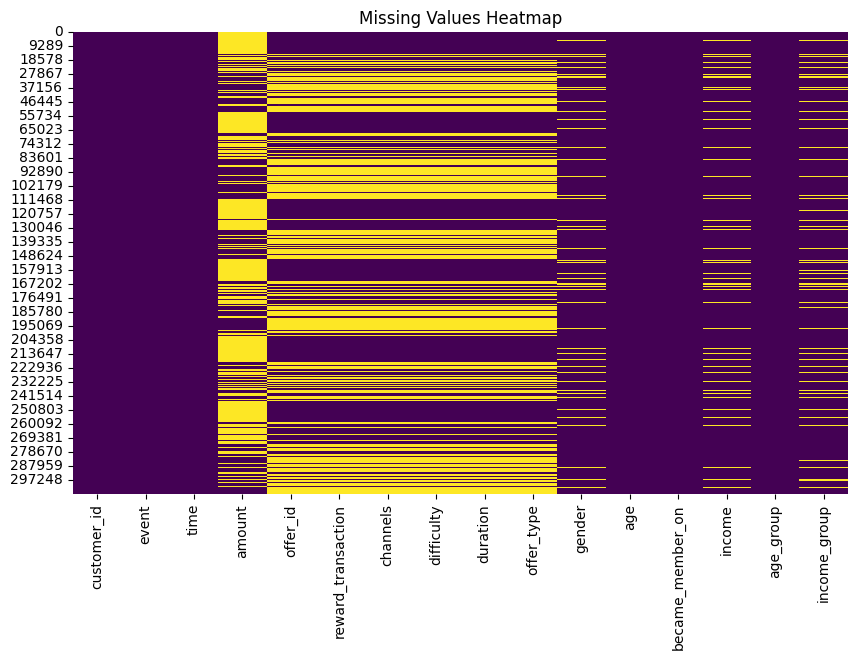

In [21]:
# Generate a heatmap of missing values
plt.figure(figsize=(10, 6))
sns.heatmap(business_data.isnull(), cbar=False, cmap='viridis')

# title
plt.title('Missing Values Heatmap')

# plotting
plt.show()

In [22]:
#Inspecting gender
business_data['gender'].unique()

array(['F', None, 'M', 'O'], dtype=object)

In [23]:
#Replacing 'O' with the 'F' and dropping rows where the 'gender' column has a None value
# Replace 'O' with 'F' and drop None values
business_data['gender'] = business_data['gender'].replace({'O': 'F'})

# Drop rows where the 'gender' column has a None value
business_data = business_data.dropna(subset=['gender'])

In [24]:
business_data.columns

Index(['customer_id', 'event', 'time', 'amount', 'offer_id',
       'reward_transaction', 'channels', 'difficulty', 'duration',
       'offer_type', 'gender', 'age', 'became_member_on', 'income',
       'age_group', 'income_group'],
      dtype='object')

In [25]:
#Replacing the missing values with zeros in the listed columns
nulls = ['amount', 'offer_id', 'reward_transaction','channels','difficulty', 'duration', 'offer_type' ]

# Replace null values with 0 in the specified columns
business_data[nulls] = business_data[nulls].fillna(0)


In [26]:
#Replacing the missing values in the income column with the mean income
business_data['income'].fillna(business_data['income'].mean(), inplace=True)

<Axes: >

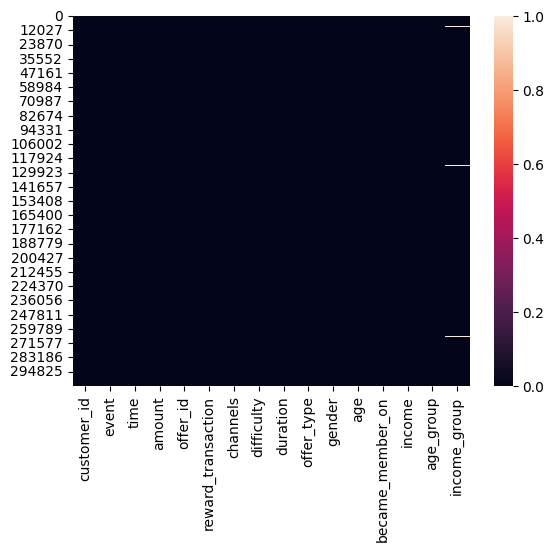

In [27]:
#inspecting the missing values again
sns.heatmap(business_data.isnull())

In [28]:
business_data.dtypes

customer_id             object
event                   object
time                     int64
amount                 float64
offer_id                object
reward_transaction     float64
channels                object
difficulty             float64
duration               float64
offer_type              object
gender                  object
age                      int64
became_member_on        object
income                 float64
age_group             category
income_group          category
dtype: object

In [29]:
#Converting 'became_member_on' to datetime variable
business_data['became_member_on'] = pd.to_datetime(business_data['became_member_on'], format='%Y-%m-%d')

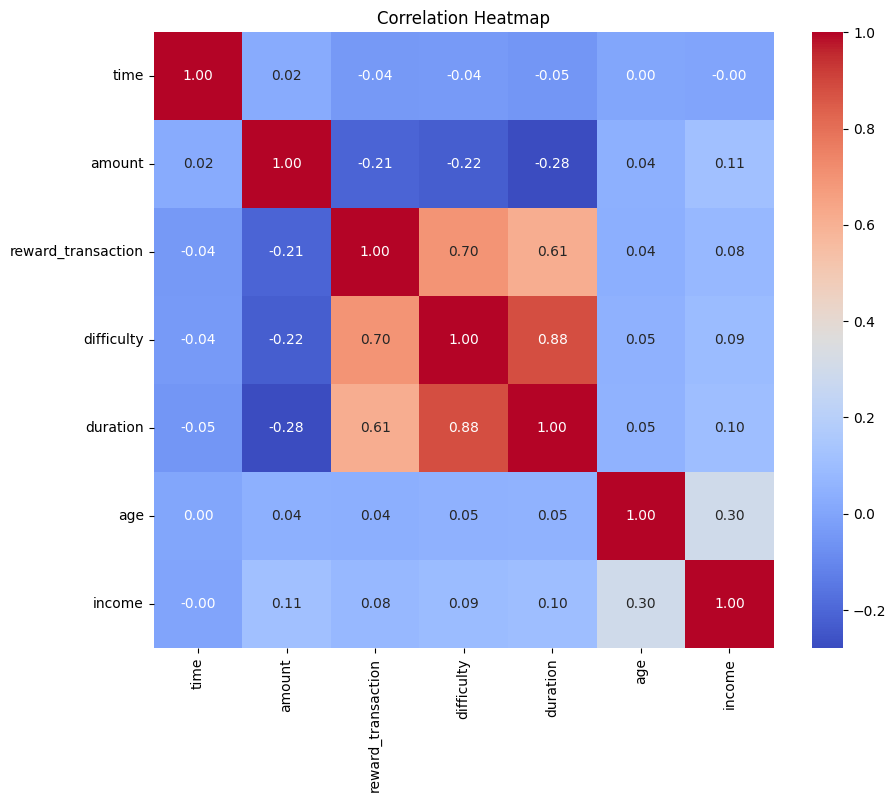

In [30]:
#Establishing relationship between variables
# Calculate the correlation matrix
correlation_matrix = business_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add a title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

**EXPLORATORY DATA ANALYSIS**
1. Univariate Data Analysis
2. Bivariate Data Analysis

In [31]:
business_data.head(50)

,customer_id,event,time,amount,offer_id,reward_transaction,channels,difficulty,duration,offer_type,gender,age,became_member_on,income,age_group,income_group
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,0.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,5.0,"[web, email, mobile]",5.0,7.0,bogo,F,75,2017-05-09,100000.0,66-75ys,90-105k
2,e2127556f4f64592b11af22de27a7932,offer received,0,0.0,2906b810c7d4411798c6938adc9daaa5,2.0,"[web, email, mobile]",10.0,7.0,discount,M,68,2018-04-26,70000.0,66-75ys,60-75k
5,389bc3fa690240e798340f5a15918d5c,offer received,0,0.0,f19421c1d4aa40978ebb69ca19b0e20d,5.0,"[web, email, mobile, social]",5.0,5.0,bogo,M,65,2018-02-09,53000.0,56-65ys,45-60k
7,2eeac8d8feae4a8cad5a6af0499a211d,offer received,0,0.0,3f207df678b143eea3cee63160fa8bed,0.0,"[web, email, mobile]",0.0,4.0,informational,M,58,2017-11-11,51000.0,56-65ys,45-60k
8,aa4862eba776480b8bb9c68455b8c2e1,offer received,0,0.0,0b1e1539f2cc45b7b9fa7c272da2e1d7,5.0,"[web, email]",20.0,10.0,discount,F,61,2017-09-11,57000.0,56-65ys,45-60k
9,31dda685af34476cad5bc968bdb01c53,offer received,0,0.0,0b1e1539f2cc45b7b9fa7c272da2e1d7,5.0,"[web, email]",20.0,10.0,discount,F,62,2016-02-11,71000.0,56-65ys,60-75k
12,4b0da7e80e5945209a1fdddfe813dbe0,offer received,0,0.0,ae264e3637204a6fb9bb56bc8210ddfd,10.0,"[email, mobile, social]",10.0,7.0,bogo,M,64,2017-09-09,100000.0,56-65ys,90-105k
13,c27e0d6ab72c455a8bb66d980963de60,offer received,0,0.0,3f207df678b143eea3cee63160fa8bed,0.0,"[web, email, mobile]",0.0,4.0,informational,F,78,2017-06-16,71000.0,76-85ys,60-75k
14,d53717f5400c4e84affdaeda9dd926b3,offer received,0,0.0,0b1e1539f2cc45b7b9fa7c272da2e1d7,5.0,"[web, email]",20.0,10.0,discount,F,88,2017-05-18,53000.0,> 86ys,45-60k
15,f806632c011441378d4646567f357a21,offer received,0,0.0,fafdcd668e3743c1bb461111dcafc2a4,2.0,"[web, email, mobile, social]",10.0,10.0,discount,M,42,2013-08-11,69000.0,36-45ys,60-75k


count    272762.000000
mean         53.840696
std          17.551337
min          18.000000
25%          41.000000
50%          55.000000
75%          66.000000
max         101.000000
Name: age, dtype: float64


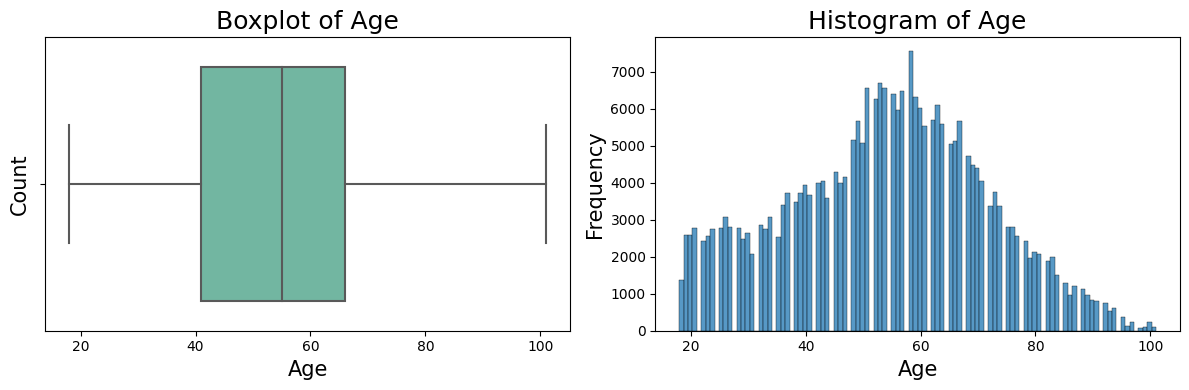

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Boxplot with custom color palette
sns.boxplot(data=business_data, x='age', ax=axs[0], palette='Set2')
axs[0].set_xlabel('Age', fontsize=15)
axs[0].set_ylabel('Count', fontsize=15)
axs[0].set_title('Boxplot of Age', fontsize=18)

# Histogram with custom color palette
sns.histplot(data=business_data, x='age', ax=axs[1], palette='Set3')
axs[1].set_xlabel('Age', fontsize=15)
axs[1].set_ylabel('Frequency', fontsize=15)
axs[1].set_title('Histogram of Age', fontsize=18)

# Display descriptive statistics
print(business_data['age'].describe())

plt.tight_layout()
plt.show()

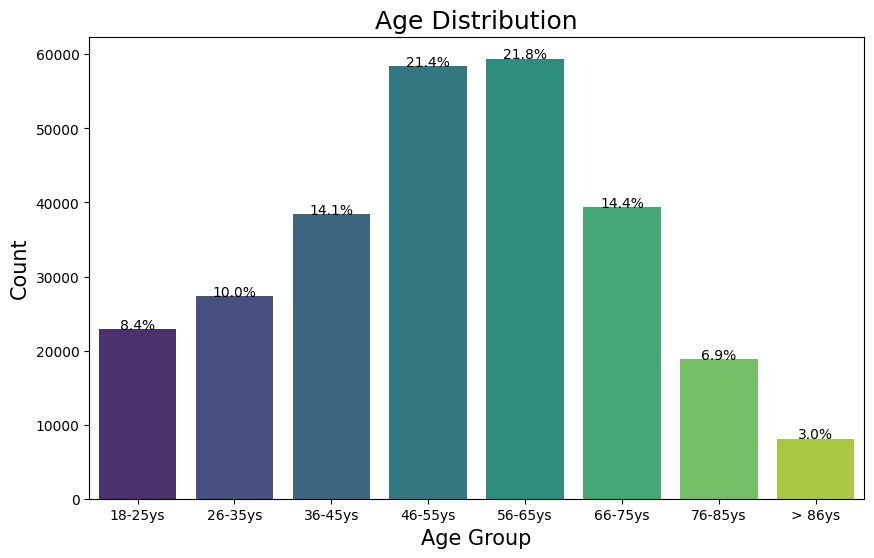

In [33]:
# Define age bins
age_bins = [0, 26, 36, 46, 56, 66, 76, 86, 150]
age_labels = ['18-25ys', '26-35ys', '36-45ys', '46-55ys', '56-65ys', '66-75ys', '76-85ys', '> 86ys']

# Create age_group column
business_data['age_group'] = pd.cut(business_data['age'], bins=age_bins, labels=age_labels)

# Visualize customers by age groups using Seaborn
plt.figure(figsize=(10, 6))
sns.countplot(data=business_data, x='age_group', order=age_labels, palette='viridis')
plt.xlabel('Age Group', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Age Distribution', fontsize=18)

# Display percentage on top of each bar
total_records = business_data.shape[0]
for i, count in enumerate(business_data['age_group'].value_counts().sort_index()):
    plt.text(i, count + 0.1, f'{(count / total_records * 100):.1f}%', ha='center', fontsize=10)

plt.show()

Probability Density Function of Age

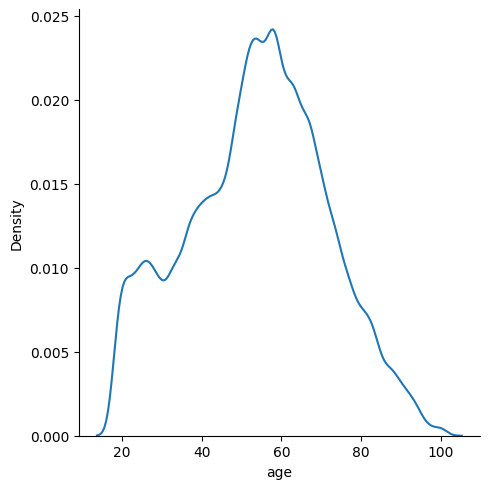

In [34]:
#Age kernel density estimate
sns.displot(business_data['age'], kind ='kde')

Customer Gender Composition

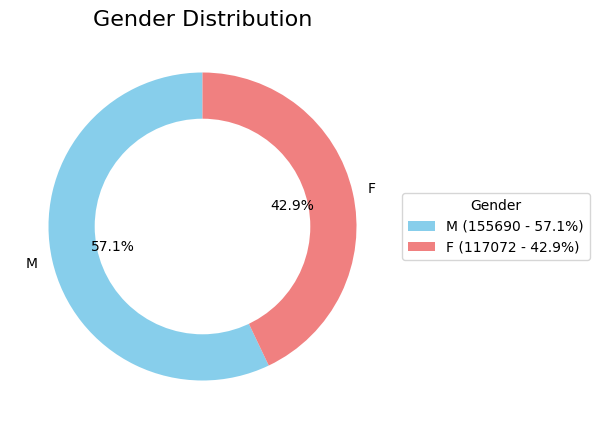

In [35]:
# Calculate the counts and percentages for each gender category
gender_counts = business_data['gender'].value_counts()
total_count = len(business_data['gender'])
percentage_values = (gender_counts / total_count) * 100

# Create a doughnut chart
fig, ax = plt.subplots(figsize=(5, 5))
wedge_labels = gender_counts.index
wedge_sizes = gender_counts.values
plt.pie(x=wedge_sizes, labels=wedge_labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.gca().add_artist(plt.Circle((0,0),0.70,fc='white'))

# Create a legend
legend_labels = [f'{label} ({count} - {percentage:.1f}%)' for label, count, percentage in zip(wedge_labels, wedge_sizes, percentage_values)]
plt.legend(legend_labels, loc="center left", bbox_to_anchor=(1, 0.5), title='Gender')

# Set title
plt.title('Gender Distribution', fontsize=16)

# Display the plot
plt.show()

Income Distribution

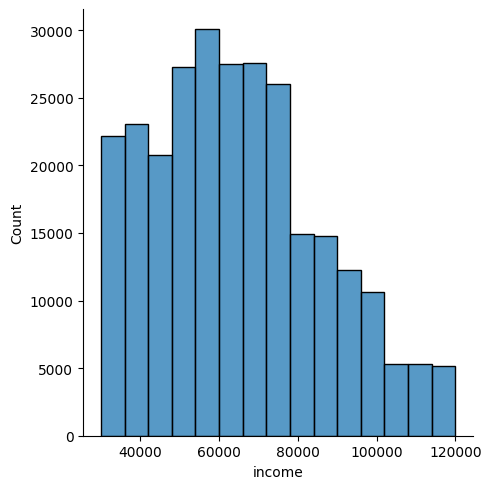

In [36]:
sns.displot(business_data['income'], bins = 15)

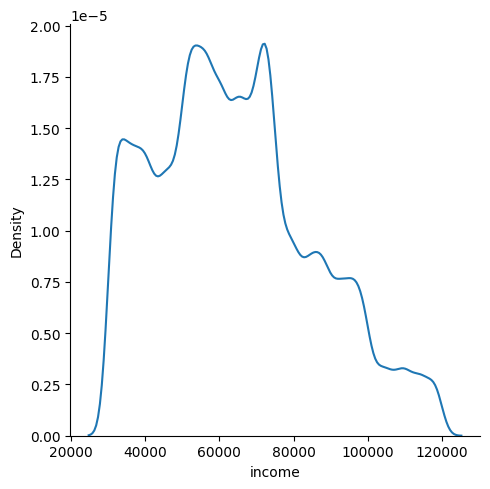

In [37]:
#Income kernel density estimate
sns.displot(business_data['income'], kind ='kde')

count    272762.000000
mean      64337.000755
std       21243.762941
min       30000.000000
25%       48000.000000
50%       62000.000000
75%       78000.000000
max      120000.000000
Name: income, dtype: float64


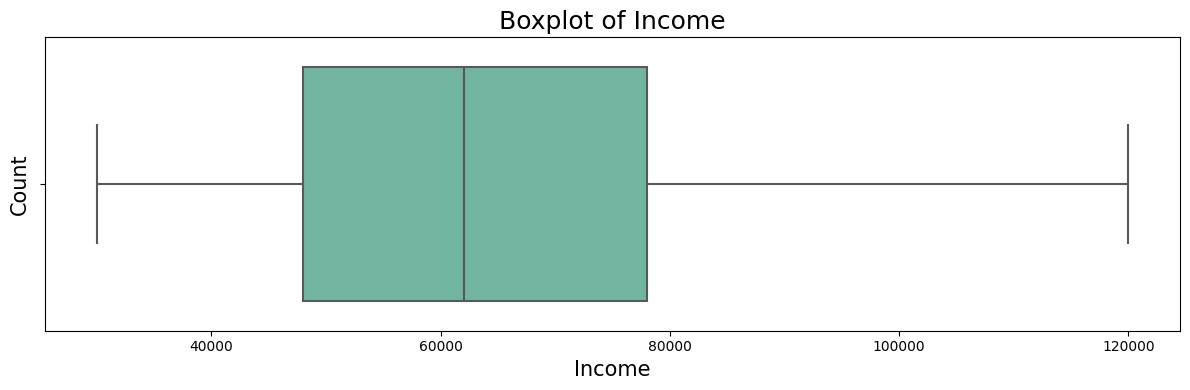

In [38]:
# Boxplot with custom color palette
plt.figure(figsize=(12, 4))
sns.boxplot(data=business_data, x='income', palette='Set2')
plt.xlabel('Income', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Boxplot of Income', fontsize=18)
# Display descriptive statistics
print(business_data['income'].describe())

plt.tight_layout()
plt.show()

Event Distribution

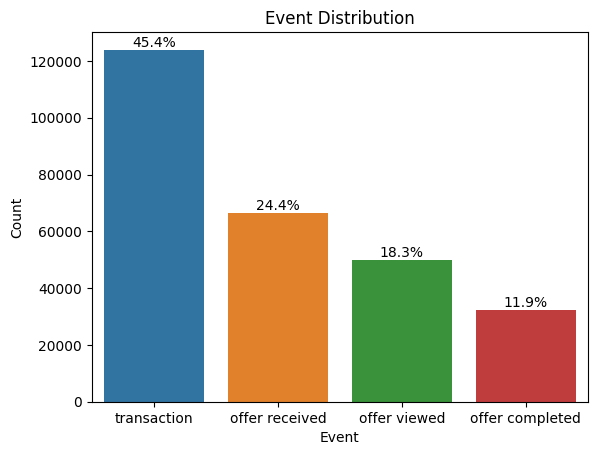

In [39]:
# Calculate the counts and percentages for each gender category
event_counts = business_data['event'].value_counts()
total_count = len(business_data['event'])
percentage_values = (event_counts / total_count) * 100

# Create a bar plot using Seaborn
ax = sns.barplot(x=event_counts.index, y=event_counts.values)

# Set labels and title
plt.xlabel('Event')
plt.ylabel('Count')
plt.title('Event Distribution')

# Annotate each bar with the percentage
for i, v in enumerate(event_counts):
    percentage = percentage_values[i]
    ax.text(i, v + 1, f'{percentage:.1f}%', ha='center', va='bottom')

# Display the plot
plt.show()

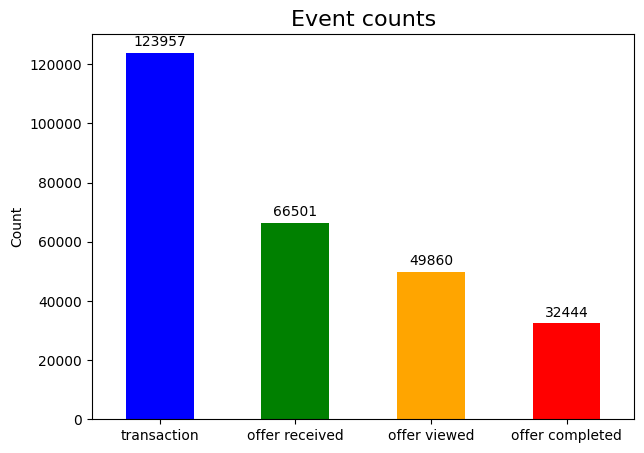

In [40]:
fig, ax = plt.subplots(figsize=(7, 5))
event_counts = business_data['event'].value_counts()

# Define colors for each event
colors = ['blue', 'green', 'orange', 'red']

# Plotting the bar chart with custom colors
bars = event_counts.plot(kind='bar', ax=ax, color=colors)

# Adding data labels on top of each bar
for bar in bars.patches:
    yval = bar.get_height()
    xval = bar.get_x() + bar.get_width() / 2
    ax.text(xval, yval + 0.01 * max(event_counts), round(yval, 2), ha='center', va='bottom', fontsize=10)

# Customize the plot
plt.xticks(rotation=None)
plt.ylabel('Count')
plt.title('Event counts', fontsize=16)

# Display the plot
plt.show()

**Bivariate data Analysis**

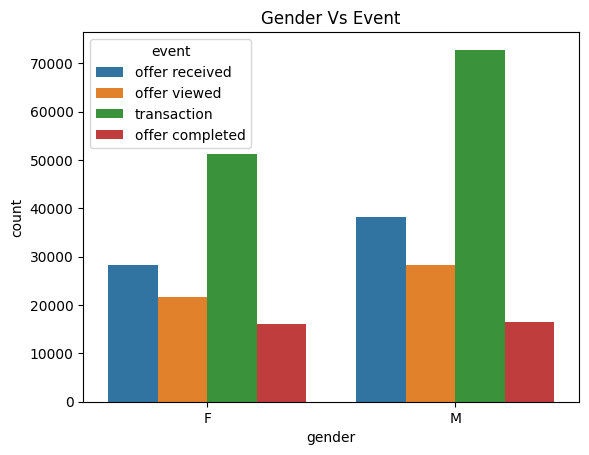

In [41]:
# Assuming you have a DataFrame named 'business_data'
sns.countplot(x='gender', hue='event', data=business_data)

# Add a title
plt.title('Gender Vs Event')

# Show the plot
plt.show()

                       income
event                        
offer completed  69430.803847
offer received   65371.618472
offer viewed     65841.596470
transaction      61843.510250


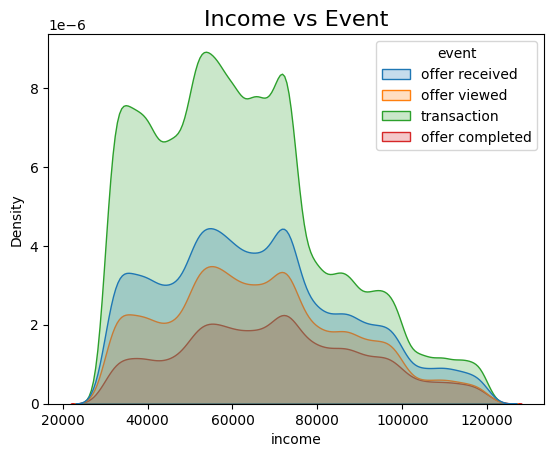

In [42]:
#Event and Income
print(business_data.groupby('event').agg({'income': 'mean'}))
sns.kdeplot(data = business_data, x = 'income', hue = 'event', fill = True)
plt.title('Income vs Event', fontsize = 16)
plt.show()

              age
gender           
F       56.646867
M       51.730580


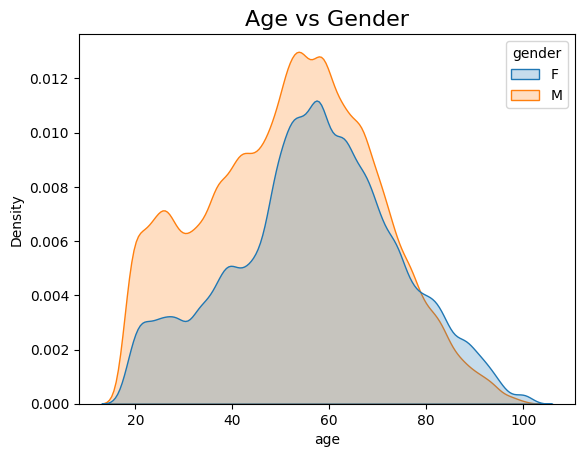

In [43]:
#Age Vs Gender
print(business_data.groupby('gender').agg({'age': 'mean'}))
sns.kdeplot(data = business_data, x = 'age', hue = 'gender', fill = True)
plt.title('Age vs Gender', fontsize = 16)
plt.show()

              income
gender              
F       69321.221129
M       60589.087289


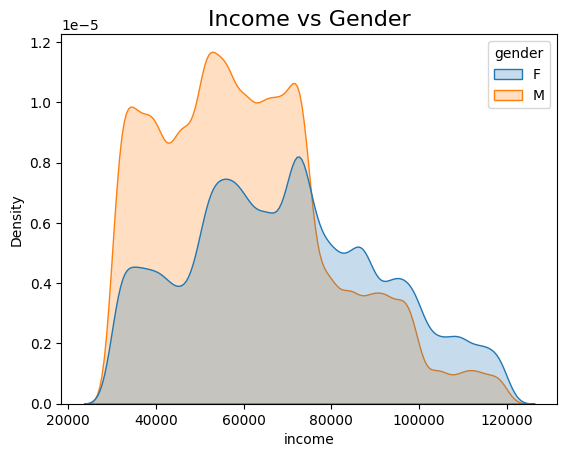

In [44]:
print(business_data.groupby('gender').agg({'income': 'mean'}))
sns.kdeplot(data = business_data, x = 'income', hue = 'gender', fill = True)
plt.title('Income vs Gender', fontsize = 16)
plt.show()

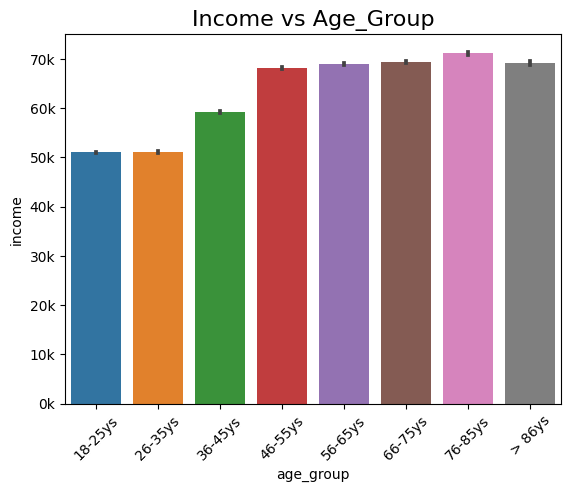

In [45]:
sns.barplot(data = business_data, x = 'age_group', y = 'income')
plt.xticks(rotation = 45)
ytick_labels = [str(i) + 'k' for i in (np.arange(0, 80000, 10000) / 1000).astype(int)]
plt.yticks(np.arange(0, 80000, 10000), labels = ytick_labels)
plt.title('Income vs Age_Group', fontsize = 16)
plt.show()

In [46]:
business_data.columns

Index(['customer_id', 'event', 'time', 'amount', 'offer_id',
       'reward_transaction', 'channels', 'difficulty', 'duration',
       'offer_type', 'gender', 'age', 'became_member_on', 'income',
       'age_group', 'income_group'],
      dtype='object')

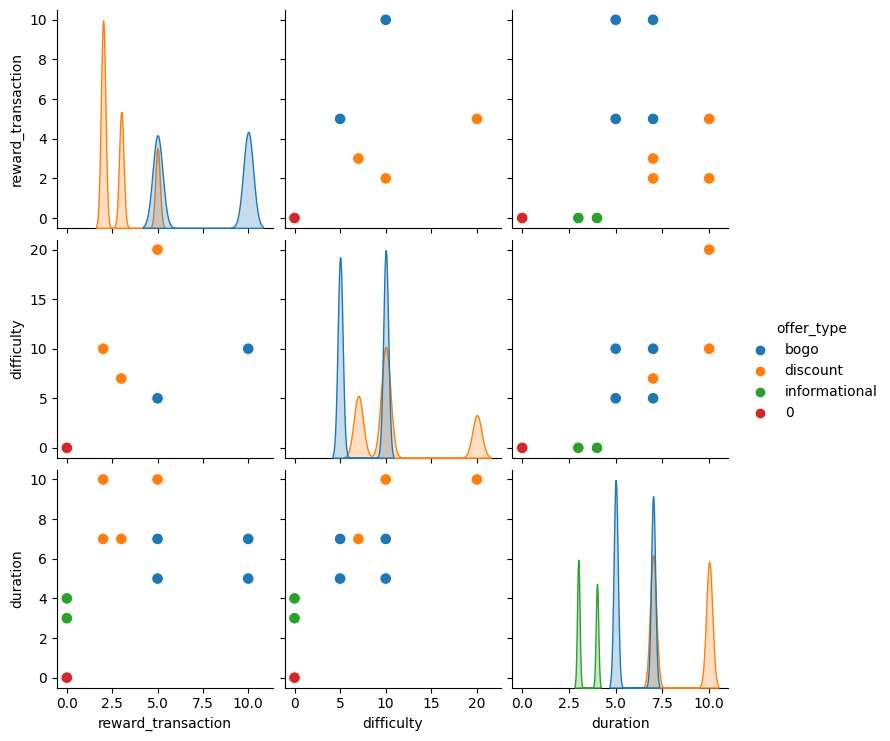

In [47]:
Pair_variables = business_data[['reward_transaction', 'difficulty', 'duration']]
sns.pairplot(business_data, hue='offer_type', vars= Pair_variables,
             plot_kws=dict(marker="o", s=70))
plt.show()

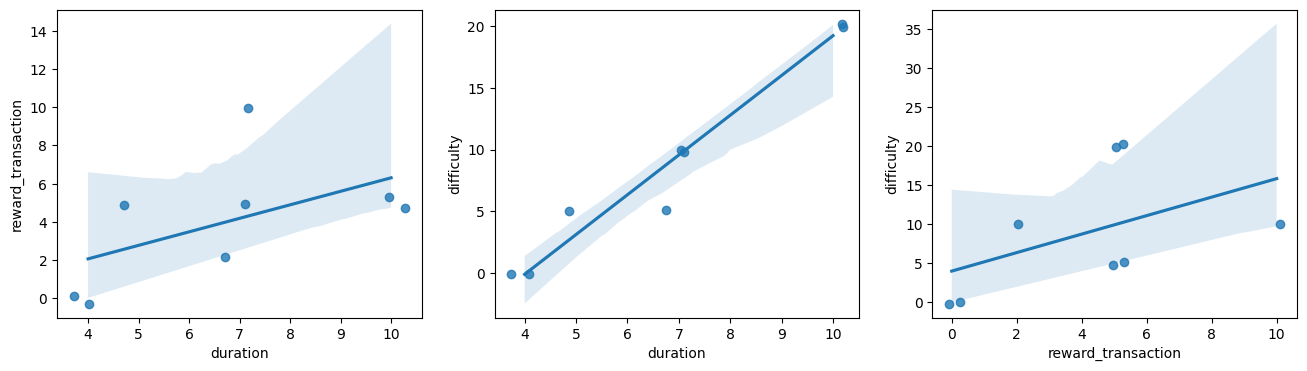

In [48]:
#Correlation observed in the pairplots
fig, axs = plt.subplots(1,3, figsize = (16,4))
sns.regplot(data = business_data[0:8], x = 'duration', y ='reward_transaction', x_jitter = 0.3, y_jitter = 0.3, ax = axs[0])
sns.regplot(data = business_data[0:8], x = 'duration', y ='difficulty', x_jitter = 0.3, y_jitter = 0.3, ax = axs[1])
sns.regplot(data = business_data[0:8], x = 'reward_transaction', y ='difficulty', x_jitter = 0.3, y_jitter = 0.3, ax = axs[2])
plt.show()

**Offer Popularity levels**

Issues to address
1. Which offers achieved the highest completion rate
2. What influenced the view rates
3. What influenced the completion rates

In [49]:
#drop rows with transactions
Event_data= business_data[business_data['event'] != 'transaction']
Event_data.head()

,customer_id,event,time,amount,offer_id,reward_transaction,channels,difficulty,duration,offer_type,gender,age,became_member_on,income,age_group,income_group
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,0.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,5.0,"[web, email, mobile]",5.0,7.0,bogo,F,75,2017-05-09,100000.0,66-75ys,90-105k
2,e2127556f4f64592b11af22de27a7932,offer received,0,0.0,2906b810c7d4411798c6938adc9daaa5,2.0,"[web, email, mobile]",10.0,7.0,discount,M,68,2018-04-26,70000.0,66-75ys,60-75k
5,389bc3fa690240e798340f5a15918d5c,offer received,0,0.0,f19421c1d4aa40978ebb69ca19b0e20d,5.0,"[web, email, mobile, social]",5.0,5.0,bogo,M,65,2018-02-09,53000.0,56-65ys,45-60k
7,2eeac8d8feae4a8cad5a6af0499a211d,offer received,0,0.0,3f207df678b143eea3cee63160fa8bed,0.0,"[web, email, mobile]",0.0,4.0,informational,M,58,2017-11-11,51000.0,56-65ys,45-60k
8,aa4862eba776480b8bb9c68455b8c2e1,offer received,0,0.0,0b1e1539f2cc45b7b9fa7c272da2e1d7,5.0,"[web, email]",20.0,10.0,discount,F,61,2017-09-11,57000.0,56-65ys,45-60k


In [50]:
Event_data['offer_id'].unique()

array(['9b98b8c7a33c4b65b9aebfe6a799e6d9',
       '2906b810c7d4411798c6938adc9daaa5',
       'f19421c1d4aa40978ebb69ca19b0e20d',
       '3f207df678b143eea3cee63160fa8bed',
       '0b1e1539f2cc45b7b9fa7c272da2e1d7',
       'ae264e3637204a6fb9bb56bc8210ddfd',
       'fafdcd668e3743c1bb461111dcafc2a4',
       '4d5c57ea9a6940dd891ad53e9dbe8da0',
       '2298d6c36e964ae4a3e7e9706d1fb8c2',
       '5a8bc65990b245e5a138643cd4eb9837'], dtype=object)

In [51]:
Event_data['offer_alias'] = Event_data['offer_id'].map({'9b98b8c7a33c4b65b9aebfe6a799e6d9': 'A',
'2906b810c7d4411798c6938adc9daaa5': 'B',
'f19421c1d4aa40978ebb69ca19b0e20d': 'C',
'3f207df678b143eea3cee63160fa8bed': 'D',
'0b1e1539f2cc45b7b9fa7c272da2e1d7': 'E',
'ae264e3637204a6fb9bb56bc8210ddfd': 'F',
'fafdcd668e3743c1bb461111dcafc2a4': 'G',
'4d5c57ea9a6940dd891ad53e9dbe8da0': 'H',
'2298d6c36e964ae4a3e7e9706d1fb8c2': 'I',
'5a8bc65990b245e5a138643cd4eb9837': 'J'
})
Event_data.head()

,customer_id,event,time,amount,offer_id,reward_transaction,channels,difficulty,duration,offer_type,gender,age,became_member_on,income,age_group,income_group,offer_alias
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,0.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,5.0,"[web, email, mobile]",5.0,7.0,bogo,F,75,2017-05-09,100000.0,66-75ys,90-105k,A
2,e2127556f4f64592b11af22de27a7932,offer received,0,0.0,2906b810c7d4411798c6938adc9daaa5,2.0,"[web, email, mobile]",10.0,7.0,discount,M,68,2018-04-26,70000.0,66-75ys,60-75k,B
5,389bc3fa690240e798340f5a15918d5c,offer received,0,0.0,f19421c1d4aa40978ebb69ca19b0e20d,5.0,"[web, email, mobile, social]",5.0,5.0,bogo,M,65,2018-02-09,53000.0,56-65ys,45-60k,C
7,2eeac8d8feae4a8cad5a6af0499a211d,offer received,0,0.0,3f207df678b143eea3cee63160fa8bed,0.0,"[web, email, mobile]",0.0,4.0,informational,M,58,2017-11-11,51000.0,56-65ys,45-60k,D
8,aa4862eba776480b8bb9c68455b8c2e1,offer received,0,0.0,0b1e1539f2cc45b7b9fa7c272da2e1d7,5.0,"[web, email]",20.0,10.0,discount,F,61,2017-09-11,57000.0,56-65ys,45-60k,E


In [52]:
# Group by Offer Alias and take the first value in each group
completion_table = Event_data.groupby('offer_alias')['offer_type'].first().reset_index()

# Print the resulting table
print(completion_table)

  offer_alias     offer_type
0           A           bogo
1           B       discount
2           C           bogo
3           D  informational
4           E       discount
5           F           bogo
6           G       discount
7           H           bogo
8           I       discount
9           J  informational


**1. Overal Completion rate**

In [53]:
# Find out the number of time being received for each offer
offer_received = Event_data[Event_data['event'] == 'offer received']
p0 = offer_received.value_counts('offer_alias').sort_values(ascending = False)

# Find out the number of time being completed for each offer
offer_completed = Event_data[Event_data['event'] == 'offer completed']
p2 = offer_completed.value_counts('offer_alias').sort_values(ascending = False)

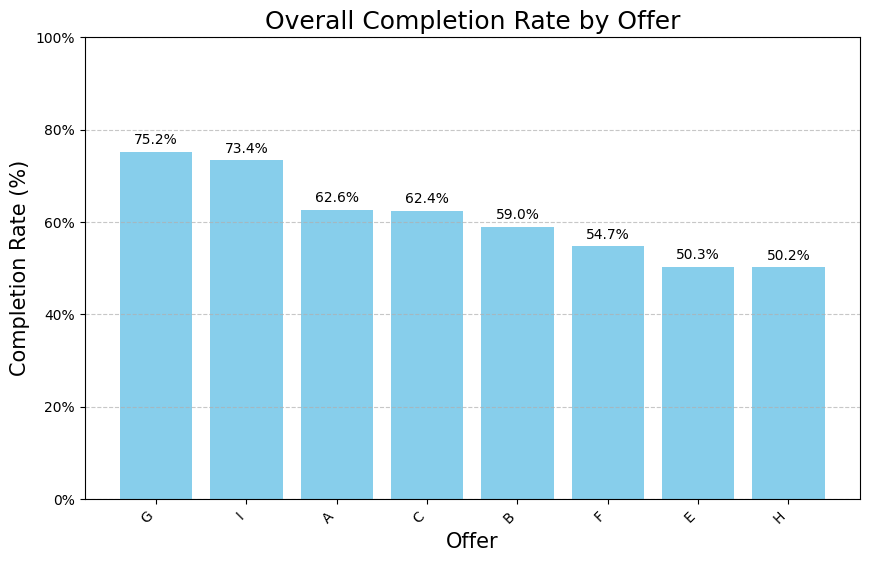

In [54]:
# Calculate overall completion rate for each offer
overall_completion_rate = (p2.sort_index() / p0.sort_index()).sort_values(ascending=False)

# Visualize the overall completion rate
plt.figure(figsize=(10, 6))
bars = plt.bar(x=overall_completion_rate.index, height=overall_completion_rate.values, color='skyblue')

# Add labels on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f'{yval:.1%}', ha='center', va='bottom', fontsize=10)

plt.title('Overall Completion Rate by Offer', fontsize=18)
plt.xlabel('Offer', fontsize=15)
plt.ylabel('Completion Rate (%)', fontsize=15)
plt.yticks(np.arange(0, 1.2, 0.2), labels=['0%', '20%', '40%', '60%', '80%', '100%'])
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines
plt.show()

2. What influenced the view rate

*   offers with the higest view rate
*   Contiributors to the view rates







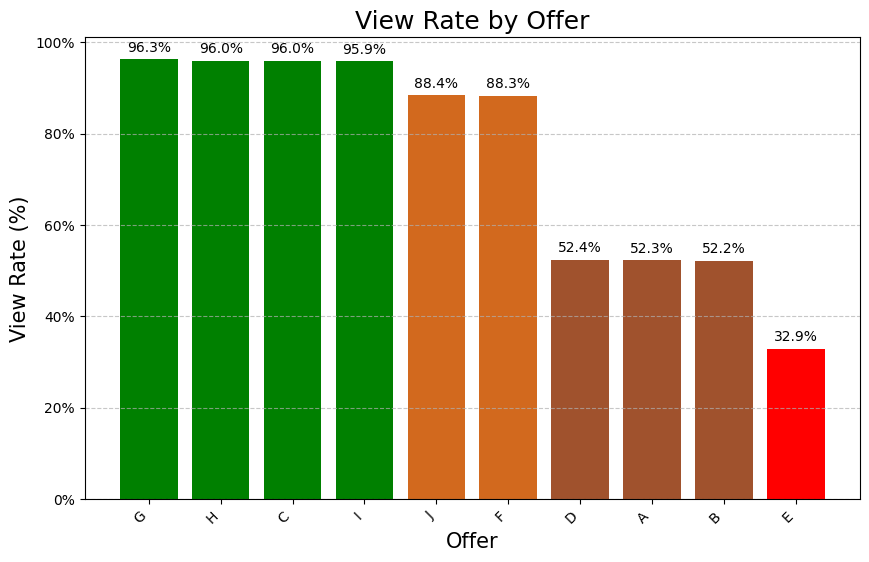

In [55]:
# Filter data for 'offer viewed' events
offer_viewed = Event_data[Event_data['event'] == 'offer viewed']

# Calculate view rate for each offer
p1 = offer_viewed.value_counts('offer_alias').sort_values(ascending=False)
p1_rate = (p1.sort_index() / p0.sort_index()).sort_values(ascending=False)

# Define colors for bars
colors = ['green', 'green', 'green', 'green', 'chocolate', 'chocolate', 'sienna', 'sienna', 'sienna', 'red']

# Visualize view rate
plt.figure(figsize=(10, 6))
bars = plt.bar(x=np.arange(len(p1_rate)), height=p1_rate.values, tick_label=p1_rate.index.values, color=colors)

# Add labels and annotations on the bars
for i, bar in enumerate(bars):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f'{yval:.1%}', ha='center', va='bottom', fontsize=10)

plt.title('View Rate by Offer', fontsize=18)
plt.xlabel('Offer', fontsize=15)
plt.ylabel('View Rate (%)', fontsize=15)
plt.yticks(np.arange(0, 1.2, 0.2), labels=['0%', '20%', '40%', '60%', '80%', '100%'])
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines
plt.show()

In [56]:
Event_data

,customer_id,event,time,amount,offer_id,reward_transaction,channels,difficulty,duration,offer_type,gender,age,became_member_on,income,age_group,income_group,offer_alias
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,0.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,5.0,"[web, email, mobile]",5.0,7.0,bogo,F,75,2017-05-09,100000.0,66-75ys,90-105k,A
2,e2127556f4f64592b11af22de27a7932,offer received,0,0.0,2906b810c7d4411798c6938adc9daaa5,2.0,"[web, email, mobile]",10.0,7.0,discount,M,68,2018-04-26,70000.0,66-75ys,60-75k,B
5,389bc3fa690240e798340f5a15918d5c,offer received,0,0.0,f19421c1d4aa40978ebb69ca19b0e20d,5.0,"[web, email, mobile, social]",5.0,5.0,bogo,M,65,2018-02-09,53000.0,56-65ys,45-60k,C
7,2eeac8d8feae4a8cad5a6af0499a211d,offer received,0,0.0,3f207df678b143eea3cee63160fa8bed,0.0,"[web, email, mobile]",0.0,4.0,informational,M,58,2017-11-11,51000.0,56-65ys,45-60k,D
8,aa4862eba776480b8bb9c68455b8c2e1,offer received,0,0.0,0b1e1539f2cc45b7b9fa7c272da2e1d7,5.0,"[web, email]",20.0,10.0,discount,F,61,2017-09-11,57000.0,56-65ys,45-60k,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306483,84fb57a7fe8045a8bf6236738ee73a0f,offer viewed,714,0.0,5a8bc65990b245e5a138643cd4eb9837,0.0,"[email, mobile, social]",0.0,3.0,informational,F,64,2017-06-15,113000.0,56-65ys,> 105k,J
306490,abc4359eb34e4e2ca2349da2ddf771b6,offer viewed,714,0.0,3f207df678b143eea3cee63160fa8bed,0.0,"[web, email, mobile]",0.0,4.0,informational,M,51,2014-08-04,68000.0,46-55ys,60-75k,D
306507,8dda575c2a1d44b9ac8e8b07b93d1f8e,offer viewed,714,0.0,0b1e1539f2cc45b7b9fa7c272da2e1d7,5.0,"[web, email]",20.0,10.0,discount,F,60,2017-09-08,64000.0,56-65ys,60-75k,E
306509,8431c16f8e1d440880db371a68f82dd0,offer completed,714,0.0,fafdcd668e3743c1bb461111dcafc2a4,2.0,"[web, email, mobile, social]",10.0,10.0,discount,M,39,2018-06-27,39000.0,36-45ys,30-45k,G


Completion rate

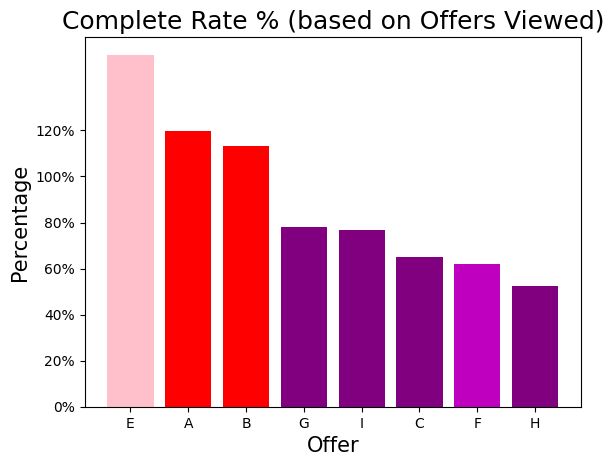

In [59]:
# offer_completed = event_offer[event_offer['event'] == 'offer completed']
p2 = offer_completed.value_counts('offer_alias').sort_values(ascending = False)

p2_rate = (p2.sort_index() / p1.sort_index()).sort_values(ascending = False)
color_list = ['pink', 'red', 'red', 'purple', 'purple', 'purple', 'm', 'purple']
plt.bar(x = p2_rate.index.values, height = p2_rate.values, color = color_list)
plt.title('Complete Rate % (based on Offers Viewed)', fontsize = 18)
plt.xlabel('Offer', fontsize = 15)
plt.ylabel('Percentage', fontsize = 15)
plt.yticks(np.arange(0,1.4, 0.2), labels = ['0%', '20%', '40%', '60%', '80%', '100%', '120%'])
plt.show()

In [60]:
portfolio['offer_alias'] = portfolio['id'].map({'9b98b8c7a33c4b65b9aebfe6a799e6d9': 'A',
'2906b810c7d4411798c6938adc9daaa5': 'B',
'f19421c1d4aa40978ebb69ca19b0e20d': 'C',
'3f207df678b143eea3cee63160fa8bed': 'D',
'0b1e1539f2cc45b7b9fa7c272da2e1d7': 'E',
'ae264e3637204a6fb9bb56bc8210ddfd': 'F',
'fafdcd668e3743c1bb461111dcafc2a4': 'G',
'4d5c57ea9a6940dd891ad53e9dbe8da0': 'H',
'2298d6c36e964ae4a3e7e9706d1fb8c2': 'I',
'5a8bc65990b245e5a138643cd4eb9837': 'J'
})


In [61]:
# Create a new df to hold the relavent variables
offers_added = portfolio.assign(view_rate = p1_rate.sort_index().values,
                            complete_rate = p2_rate.sort_index().values)

# Set `offer_alias` as index
offers_added.set_index('offer_alias', inplace = True)

# From the new df, extract `view_rate`, 'complete_rate' and other numeric columns
offers_numeric = offers_added.select_dtypes(include = 'number')
offers_numeric.head(5)

,reward,difficulty,duration,view_rate,complete_rate
offer_alias,,,,,
F,10,10,7.0,0.523411,1.196913
H,10,10,5.0,0.521792,1.130347
D,0,0,4.0,0.959550,0.650238
A,5,5,7.0,0.523810,NaN
E,5,20,10.0,0.329319,1.528668


**Customer Segmentation**

In this section, customer segmentation will be performed based on their transactional records during the campaign month. The extracted features for each customer include the number of offers received, the number of offers viewed, the number of offers completed, the number of transactions made, and the total amount spent during the campaign month. The segmentation will be carried out using K-Means clustering, with the determination of the optimal number of clusters (k) being guided by the Elbow method and Silhouette scores.

To assess the clustering results, clusters will initially be visualized using three feature pairs in 2D planes. This visualization provides a quick check to ensure that the clustering aligns with intuitive expectations. Additionally, a heatmap will be employed to represent the relative performance of each cluster, providing a summarized understanding of how customers were assigned to clusters.

For a deeper interpretation of the clusters, key metrics will be computed for each cluster. These metrics encompass Average Purchase Value (APV), purchase frequency, overall offer completion rate, and sensitivity to offers. These metrics contribute to a comprehensive understanding of customer behavior within each cluster, and each cluster will be assigned a self-explanatory label.

To conclude, the demographic profile of each cluster will be examined to provide further insights into the characteristics of customers within each segment.


Customer behaviour variables

In [62]:
  # Create an empty df with columns needed
customer_behavior = pd.DataFrame(columns = ['customer_id', 'num_received', 'num_viewed', 'num_completed', 'num_transactions', 'Money_spent'])

In [63]:
missing_gender = business_data[business_data['gender'].isna()]
missing_income = business_data[business_data['income'].isna()]
np.sum(missing_gender['customer_id'] == missing_income['customer_id'])

0

In [64]:
business_data.columns

Index(['customer_id', 'event', 'time', 'amount', 'offer_id',
       'reward_transaction', 'channels', 'difficulty', 'duration',
       'offer_type', 'gender', 'age', 'became_member_on', 'income',
       'age_group', 'income_group'],
      dtype='object')

In [65]:
# Remove rows of customers with missing gender and income
id_to_remove = missing_income['customer_id']
transcripts_filtered = business_data[~business_data['customer_id'].isin(id_to_remove)].reset_index(drop = True)
# Add data to `person`, ordered in ascending order
customer_behavior['customer_id'] = transcripts_filtered.value_counts('customer_id').sort_index().index.values

In [66]:
# Aggregate df transcripts
transcripts_filtered = transcripts_filtered.sort_values('customer_id')
transcripts_grouped = transcripts_filtered.groupby(['customer_id', 'event']).count()
transcripts_grouped.head()

time  amount  offer_id  \
customer_id                      event                                     
0009655768c64bdeb2e877511632db8f offer completed     3       3         3   
                                 offer received      5       5         5   
                                 offer viewed        4       4         4   
                                 transaction         8       8         8   
0011e0d4e6b944f998e987f904e8c1e5 offer completed     3       3         3   

                                                  reward_transaction  \
customer_id                      event                                 
0009655768c64bdeb2e877511632db8f offer completed                   3   
                                 offer received                    5   
                                 offer viewed                      4   
                                 transaction                       8   
0011e0d4e6b944f998e987f904e8c1e5 offer completed                   3   

                                                  channels  difficulty  \
customer_id                      event                                   
0009655768c64bdeb2e877511632db8f offer completed         3           3   
                                 offer received          5           5   
                                 offer viewed            4           4   
                                 transaction             8           8   
0011e0d4e6b944f998e987f904e8c1e5 offer completed         3           3   

                                                  duration  offer_type  \
customer_id                      event                                   
0009655768c64bdeb2e877511632db8f offer completed         3           3   
                                 offer received          5           5   
                                 offer viewed            4           4   
                                 transaction             8           8   
0011e0d4e6b944f998e987f904e8c1e5 offer completed         3           3   

                                                  gender  age  \
customer_id                      event                          
0009655768c64bdeb2e877511632db8f offer completed       3    3   
                                 offer received        5    5   
                                 offer viewed          4    4   
                                 transaction           8    8   
0011e0d4e6b944f998e987f904e8c1e5 offer completed       3    3   

                                                  became_member_on  income  \
customer_id                      event                                       
0009655768c64bdeb2e877511632db8f offer completed                 3       3   
                                 offer received                  5       5   
                                 offer viewed                    4       4   
                                 transaction                     8       8   
0011e0d4e6b944f998e987f904e8c1e5 offer completed                 3       3   

                                                  age_group  income_group  
customer_id                      event                                     
0009655768c64bdeb2e877511632db8f offer completed          3             3  
                                 offer received           5             5  
                                 offer viewed             4             4  
                                 transaction              8             8  
0011e0d4e6b944f998e987f904e8c1e5 offer completed          3             3

In [67]:
# Set `person` as index for easy slicing
customer_behavior.set_index('customer_id', inplace = True)

# Add data to `num_received`, `num_viewed`, `num_completed` and `num_transactions`
for person_id in customer_behavior.index.values:
    if (person_id, 'offer received') in list(transcripts_grouped.index.values):
        customer_behavior.loc[person_id, 'num_received'] = transcripts_grouped.loc[(person_id, 'offer received'), 'offer_id']
    if (person_id, 'offer viewed') in list(transcripts_grouped.index.values):
        customer_behavior.loc[person_id, 'num_viewed'] = transcripts_grouped.loc[(person_id, 'offer viewed'), 'offer_id']
    if (person_id, 'offer completed') in list(transcripts_grouped.index.values):
        customer_behavior.loc[person_id, 'num_completed'] = transcripts_grouped.loc[(person_id, 'offer completed'), 'offer_id']
    if (person_id, 'transaction') in list(transcripts_grouped.index.values):
        customer_behavior.loc[person_id, 'num_transactions'] = transcripts_grouped.loc[(person_id, 'transaction'), 'offer_id']

In [68]:
# Calculate how much money each customer spent during the month of the campaign
money_spent = business_data.groupby('customer_id')['amount'].sum()

# Add to `money_spent`
customer_behavior['Money_spent'] = money_spent
customer_behavior.head(3)

,num_received,num_viewed,num_completed,num_transactions,Money_spent
customer_id,,,,,
0009655768c64bdeb2e877511632db8f,5,4,3,8,127.60
0011e0d4e6b944f998e987f904e8c1e5,5,5,3,5,79.46
0020c2b971eb4e9188eac86d93036a77,5,3,3,8,196.86


In [69]:
customer_behavior['Money_spent'].max()

1608.69

In [70]:
# Replace NA with 0
customer_behavior.fillna(0, inplace = True)
customer_behavior.isna().sum()

num_received        0
num_viewed          0
num_completed       0
num_transactions    0
Money_spent         0
dtype: int64

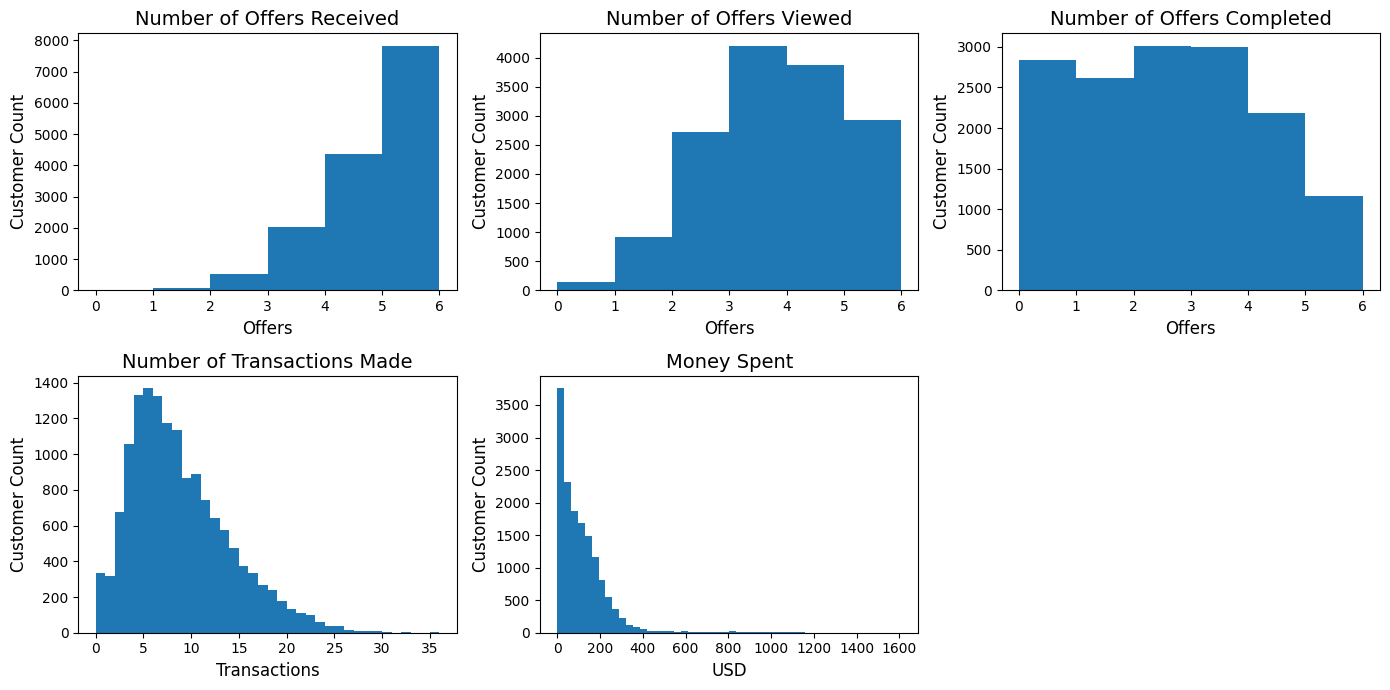

In [71]:
# Check the features with plots
fig, axs = plt.subplots(2,3, figsize = (14, 7))
fig_titles = ['Number of Offers Received', 'Number of Offers Viewed', 'Number of Offers Completed', 'Number of Transactions Made', 'Money Spent']
x_labels = ['Offers', 'Offers','Offers','Transactions','USD']
y_labels = 'Customer Count'

sub_row, sub_col = 0, 0

for i in range(5):
    if i < 3:
        sub_row = 0
        sub_col = i
        bins = max(1, customer_behavior.iloc[:, i].max())
        axs[sub_row, sub_col].hist(customer_behavior.iloc[:, i], bins = bins)
        axs[sub_row, sub_col].set_ylabel(y_labels, fontsize = 12)
    else:
        sub_row = 1
        sub_col = i - 3
        if i == 3:
            bins = customer_behavior.iloc[:, i].max()
            axs[sub_row, sub_col].hist(customer_behavior.iloc[:, i], bins = bins)
            axs[sub_row, sub_col].set_ylabel(y_labels, fontsize = 12)
        else:
            bins = 50
            axs[sub_row, sub_col].hist(customer_behavior.iloc[:, i], bins = bins)
            axs[sub_row, sub_col].set_ylabel(y_labels, fontsize = 12)

    axs[sub_row, sub_col].set_title(fig_titles[i], fontsize = 14)
    axs[sub_row, sub_col].set_xlabel(x_labels[i], fontsize = 12)

axs[1,2].set_axis_off()
plt.tight_layout()
plt.show()

**Clustering**

In [72]:
# Keep a copy of the df with `num_received`
customer_behavior_with_num_received = customer_behavior.copy()

# Drop `num_received`
customer_behavior.drop('num_received', axis = 1, inplace = True)
customer_behavior.head(3)

,num_viewed,num_completed,num_transactions,Money_spent
customer_id,,,,
0009655768c64bdeb2e877511632db8f,4,3,8,127.60
0011e0d4e6b944f998e987f904e8c1e5,5,3,5,79.46
0020c2b971eb4e9188eac86d93036a77,3,3,8,196.86


Dealing with outliers

In [73]:
customer_behavior['Money_spent'].describe()

count    14825.000000
mean       117.028155
std        129.965016
min          0.000000
25%         31.450000
50%         87.040000
75%        160.900000
max       1608.690000
Name: Money_spent, dtype: float64

The 0.75 quantile is only about $160, while the maximum is ten times of it. I will remove receord with top 2% in money_spent for runing the K-Means Clustering

**Note these customers are high-valued customers**. After the other customers have been placed into clusters, they will either be added to a suitable cluster, or form their a cluster of their own.

In [74]:
# Remove rows with top 2% in `money_spent`
q = customer_behavior['Money_spent'].quantile(0.98)
rows_top_money_spent = customer_behavior[customer_behavior['Money_spent'] >= q]

person_top_money_spent = rows_top_money_spent.index.values
customer_top_money_spent_removed = customer_behavior[customer_behavior['Money_spent'] < q]

print('Number of rows removed:', rows_top_money_spent.shape[0])

Number of rows removed: 297


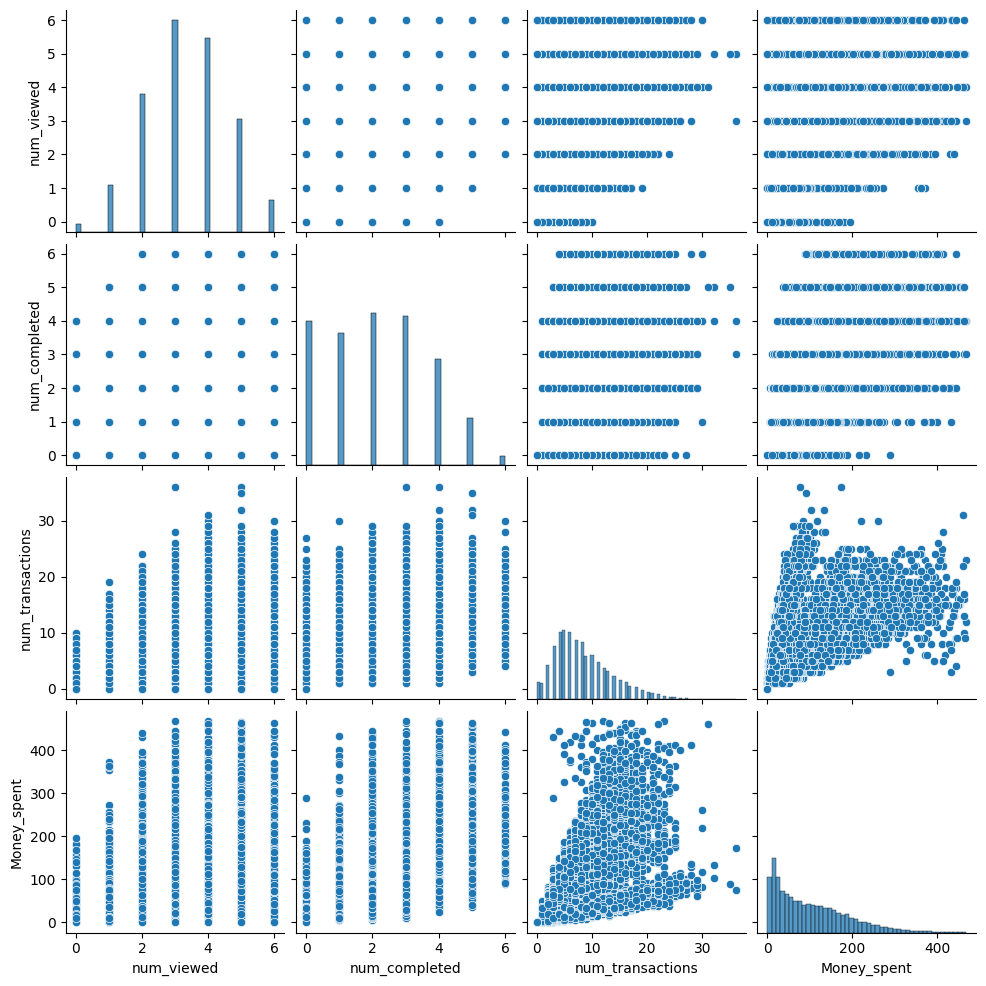

In [75]:
customer_behavior_filtered = customer_top_money_spent_removed.copy()
sns.pairplot(customer_behavior_filtered); plt.show()

**K-Means Clustering**

In [76]:
#Feature scaling
scaler_customer_behavior = StandardScaler()
scaler_customer_behavior.fit(customer_behavior_filtered)
customer_behavior_scaled = scaler_customer_behavior.transform(customer_behavior_filtered)
pd.DataFrame(data = customer_behavior_scaled, columns = customer_behavior_filtered.columns.values).head(3)

,num_viewed,num_completed,num_transactions,Money_spent
0,0.501233,0.531352,-0.060069,0.277234
1,1.276977,0.531352,-0.639666,-0.281415
2,-0.274511,0.531352,-0.060069,1.080974


Optimal number of clusters

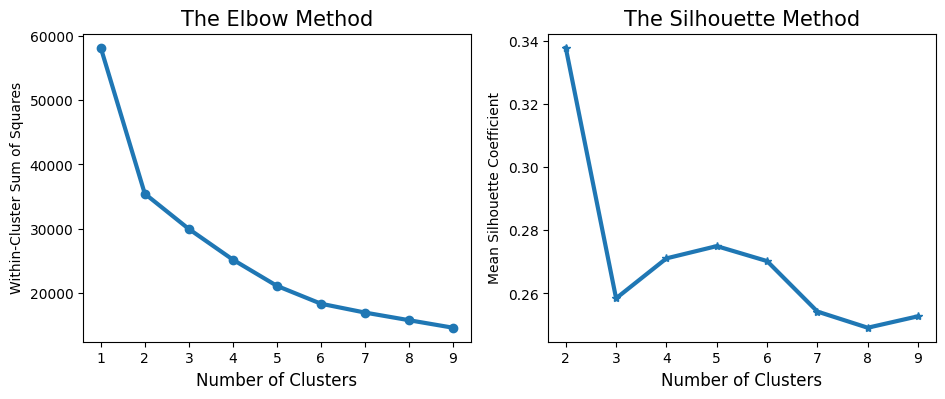

In [77]:
df_feature = customer_behavior_scaled
wcss = []
sil_score = []
max_clusters = 10

for k in range(1, max_clusters):
    kmeans = KMeans(n_clusters = k, random_state = 10)
    kmeans.fit(df_feature)
    # calculate wcss for the Elbow Method
    wcss.append(kmeans.inertia_)

    # calculate the mean Silhouette coefficient
    if k >= 2:
        labels = kmeans.labels_
        sil_score.append(metrics.silhouette_score(df_feature, labels))

        # Plot
fig, axs = plt.subplots(1,2, figsize = (11,4))
axs[0].plot(np.arange(1, max_clusters), wcss, marker = 'o', lw = 3)
axs[0].set_xlabel('Number of Clusters', fontsize = 12)
axs[0].set_ylabel('Within-Cluster Sum of Squares')
axs[0].set_title('The Elbow Method', fontsize = 15)

axs[1].plot(np.arange(2, max_clusters), sil_score, marker = '*' , lw = 3)
axs[1].set_xlabel('Number of Clusters', fontsize = 12)
axs[1].set_ylabel('Mean Silhouette Coefficient')
axs[1].set_title('The Silhouette Method', fontsize = 15)
plt.show()

The number of clusters will be 5

cluster
0    4018
1    2901
2    2649
3    1584
4    3376
dtype: int64

 ************************************************************
Silhouette Score: 0.2749914632082142

 ************************************************************
        num_viewed num_completed num_transactions Money_spent
              mean          mean             mean        mean
cluster                                                      
0              2.1           0.7              5.0        34.6
1              4.5           4.1             12.2       223.0
2              4.5           1.5              4.5        50.3
3              3.5           2.0             17.1        72.2
4              2.8           2.9              7.7       140.2


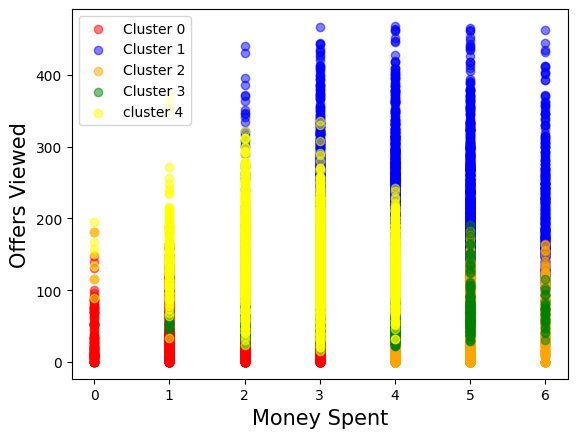

In [78]:
k = 5
df_feature = customer_behavior_scaled
kmeans = KMeans(n_clusters = k, random_state = 10)
kmeans.fit_transform(df_feature)
customer_with_cluster = customer_behavior_filtered.assign(cluster = kmeans.labels_)
print(customer_with_cluster.value_counts('cluster').sort_index())

line_sep = '*' * 60
print('\n', line_sep)
print('Silhouette Score:', metrics.silhouette_score(df_feature, labels = kmeans.labels_))

#
cluster_info = customer_with_cluster.groupby('cluster').agg([np.mean])
print('\n', line_sep)
print(cluster_info.round(1))

# Plot
color_list = ['red', 'blue', 'orange', 'green', 'yellow']
legend_list = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'cluster 4']
for i in range(k):
    plt.scatter(customer_with_cluster.loc[customer_with_cluster['cluster'] == i , 'num_viewed'],
               customer_with_cluster.loc[customer_with_cluster['cluster'] == i , 'Money_spent'],
               c = color_list[i], label = legend_list[i], alpha = 0.5)
plt.ylabel('Offers Viewed', fontsize = 15)
plt.xlabel('Money Spent', fontsize = 15)
plt.legend(legend_list)
plt.show()

**DBSCAN (Density-Based Spatial Clustering of Applications with Noise):**

Density-based clustering algorithm that groups together data points that are close to each other based on a density threshold

**Observations**

Although the Silhouette score is quite low (0.275), clusters can be identified when plotted using money_spent and num_viewed. Next, I will check the clusters visually in more details by plotting the them in separated subplots.

**Assessing the clustering results**

Here the project will use two classification methods to conduct an (indirect) assessment of the clustering results. The labelled cluster (0, 1, 2, 3, 4) will be used as target and customer behavior features used in clustering analysis will be used as inputs.

In [79]:
# Split data for train and test
X = customer_behavior_scaled
Y = customer_with_cluster['cluster']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 10)

In [80]:
# Multiclass logistic regression
clf = LogisticRegression()
clf.fit(x_train, y_train)

# Check test accurracy
y_predict = clf.predict(x_test)
print("Test accuracy:", metrics.accuracy_score(y_test, y_predict))

Test accuracy: 0.993805918788713


Classification with K-Nearest Neighbors

In [81]:
# K-Nearest Neighbors Classificaiton
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(x_train, y_train)

# Check test accuracy
y_predict = knn.predict(x_test)
print("Test accuracy:", metrics.accuracy_score(y_test, y_predict))

Test accuracy: 0.9855471438403304


Interpretation of the high test accuracy:

Both Classification methods achieved a high test accuracy, when using the labels given by K-Means clustering analysis as targets. This indicates that the patterns identified by K-Means Clustering for each cluster do exist and are sufficiently clear to be captured by both classification algorithms for over 98% of the samples.

These two trained classification models will be used to find which cluster the 2% outlier customers belong in a later section

Clustering Result Visualization & Interpretation

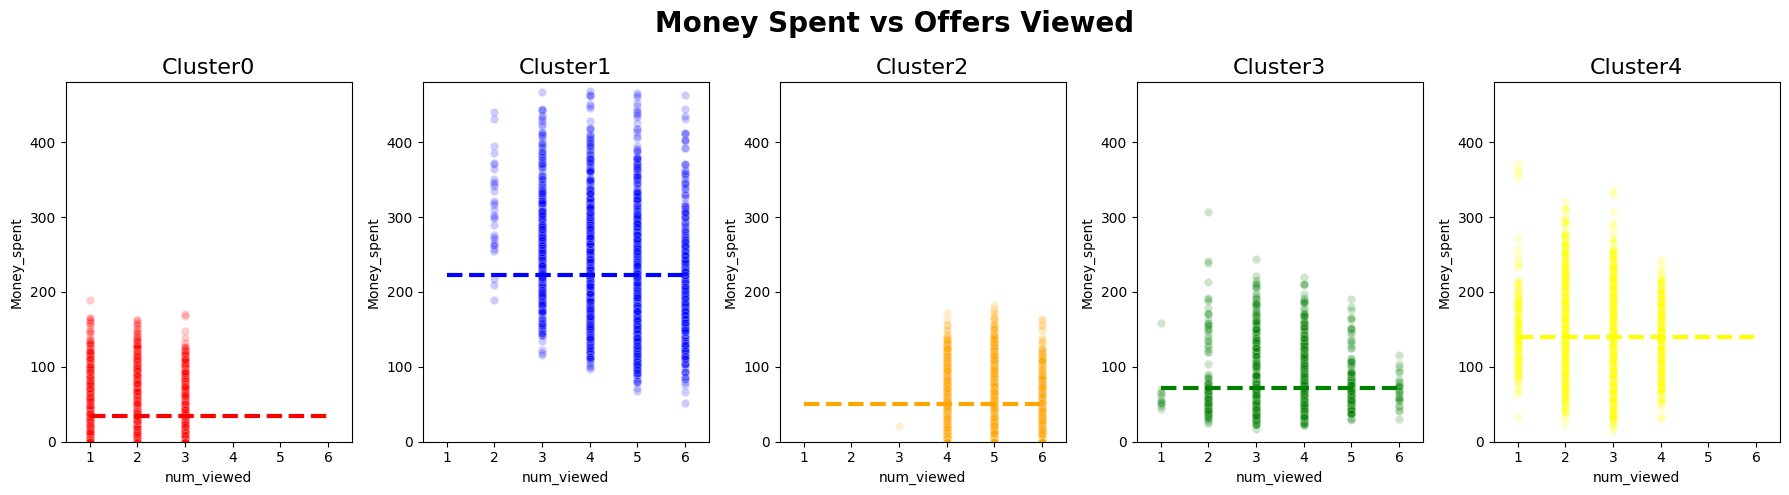

In [82]:
#Visualize clusters separately
fig, axs = plt.subplots(1, k, figsize = (18,5))
for i in range(k):
    sns.scatterplot(data = customer_with_cluster[customer_with_cluster['cluster'] == i],
                   x = 'num_viewed', y = 'Money_spent', alpha = 0.2, color = color_list[i], ax = axs[i])

    mean_value = customer_with_cluster[customer_with_cluster['cluster'] == i].agg({'Money_spent': 'mean'})
    axs[i].plot(np.arange(1, 7), (np.ones((1, 6))*mean_value.values).reshape((6,-1)),
                color = color_list[i], lw =3, linestyle = 'dashed')
    axs[i].set_title('Cluster' + str(i), fontsize = 16)
    axs[i].set_xlim((0.5,6.5))
    axs[i].set_ylim((0,480))
fig.suptitle('Money Spent vs Offers Viewed', fontsize = 20, fontweight = 'bold')
plt.tight_layout()
plt.show()

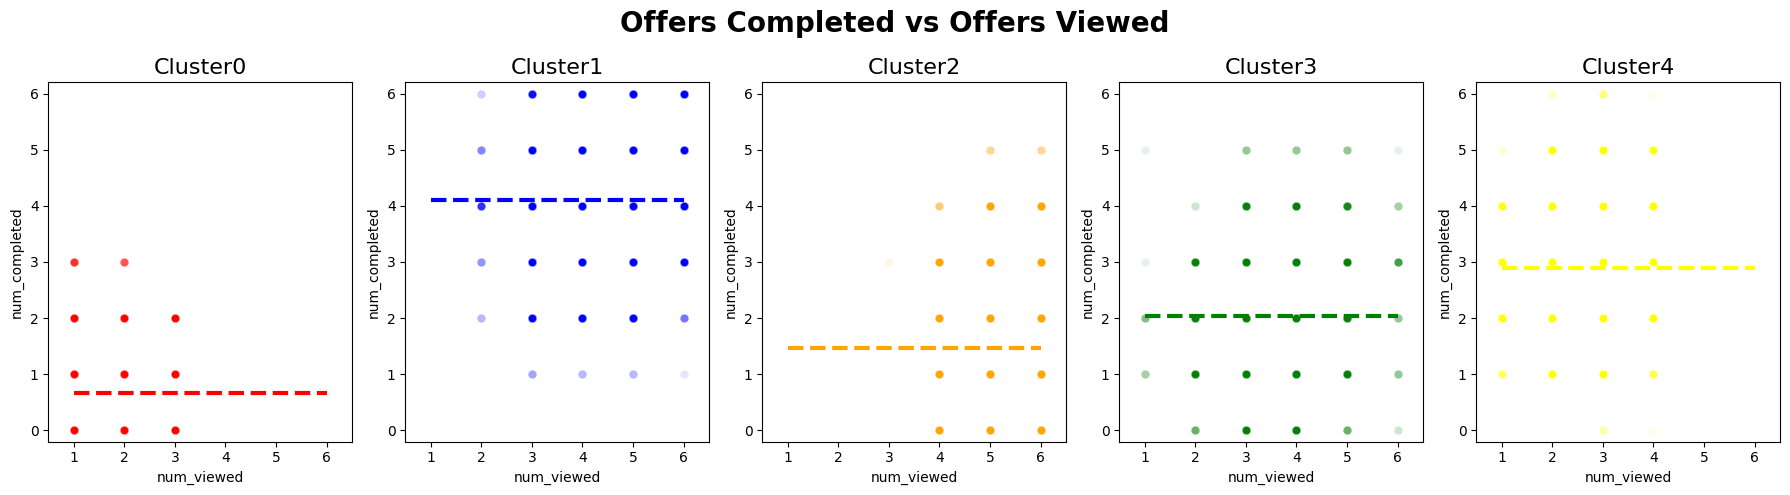

In [83]:
fig, axs = plt.subplots(1, k, figsize = (18,5))
for i in range(k):
    sns.scatterplot(data = customer_with_cluster[customer_with_cluster['cluster'] == i],
                   x = 'num_viewed', y = 'num_completed', alpha = 0.1, color = color_list[i], ax = axs[i])

    mean_value = customer_with_cluster[customer_with_cluster['cluster'] == i].agg({'num_completed': 'mean'})
    axs[i].plot(np.arange(1, 7), (np.ones((1, 6))*mean_value.values).reshape((6,-1)),
                color = color_list[i], lw =3, linestyle = 'dashed')
    axs[i].set_title('Cluster' + str(i), fontsize = 16)
    axs[i].set_xlim((0.5,6.5))
    axs[i].set_ylim((-0.2,6.2))
fig.suptitle('Offers Completed vs Offers Viewed', fontsize = 20, fontweight = 'bold')
plt.tight_layout()
plt.show()

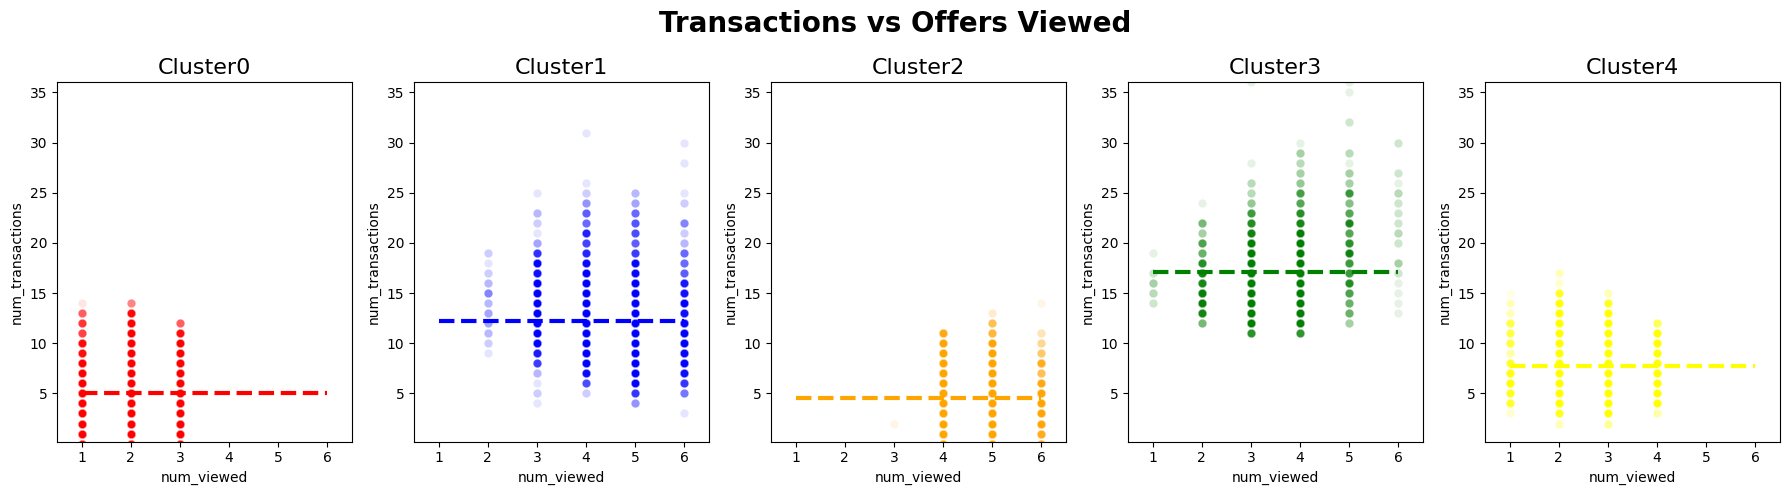

In [84]:
fig, axs = plt.subplots(1, k, figsize = (18,5))
for i in range(k):
    sns.scatterplot(data = customer_with_cluster[customer_with_cluster['cluster'] == i],
                   x = 'num_viewed', y = 'num_transactions', alpha = 0.1, color = color_list[i], ax = axs[i])

    mean_value = customer_with_cluster[customer_with_cluster['cluster'] == i].agg({'num_transactions': 'mean'})
    axs[i].plot(np.arange(1, 7), (np.ones((1, 6))*mean_value.values).reshape((6,-1)),
                color = color_list[i], lw =3, linestyle = 'dashed')
    axs[i].set_title('Cluster' + str(i), fontsize = 16)
    axs[i].set_xlim((0.5,6.5))
    axs[i].set_ylim((0.2,36))
fig.suptitle('Transactions vs Offers Viewed', fontsize = 20, fontweight = 'bold')
plt.tight_layout()
plt.show()

Observations:

Note the dashed lines are the average values of each cluster.
Differences are clear from all three pair-wise features plots. This reflects the clustering is effective even the Silhouette score is low.

Relative performace of each cluster in each field


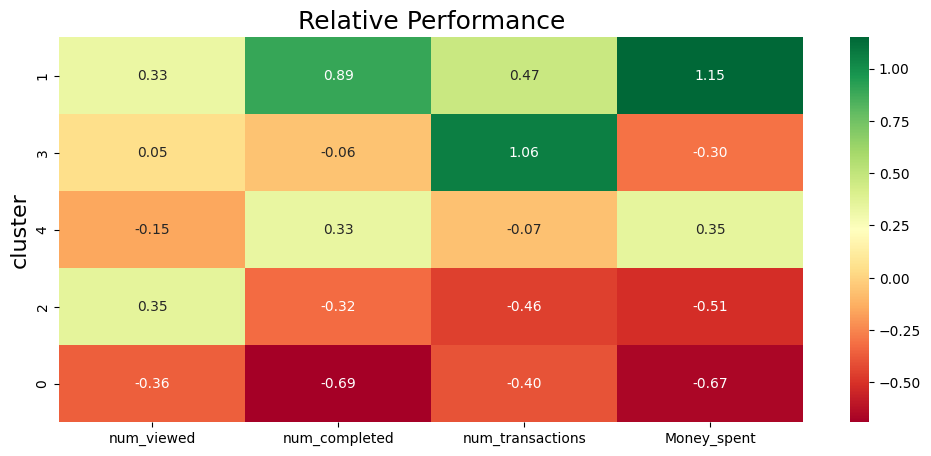

In [85]:
# Calculate the relative performace of cluster's attribute values compared to all customers as a population
cluster_mean = customer_with_cluster.groupby('cluster').mean()
population_mean = customer_with_cluster.mean()
relative_importance = (cluster_mean / population_mean[0 :-1]) - 1

# Sort clusters by overall (summation) performance
importance_ranking = relative_importance.sum(axis = 1).sort_values(ascending = False).index.values
relative_importance = relative_importance.reindex(importance_ranking)

# Plot the heatmap
plt.figure(figsize = (12, k))
plt.title('Relative Performance', fontsize = 18)
plt.xlabel('Feature', fontsize = 16)
plt.ylabel('Cluster', fontsize = 16)
sns.heatmap(data = relative_importance, annot = True, fmt = '.2f', cmap = 'RdYlGn')
plt.show()

In [86]:
# Calculated the mean of all features for each cluster
temp = pd.merge(customer_with_cluster, customer_behavior_with_num_received['num_received'], left_index = True, right_index = True)
cluster_means = temp.groupby('cluster').mean().round(3)
cluster_means = cluster_means.reindex(importance_ranking)
cluster_means

,num_viewed,num_completed,num_transactions,Money_spent,num_received
cluster,,,,,
1,4.452,4.096,12.223,222.970,5.094
3,3.512,2.028,17.098,72.242,4.674
4,2.845,2.887,7.744,140.156,4.150
2,4.541,1.463,4.529,50.347,5.029
0,2.143,0.671,4.992,34.568,3.881


In [87]:
# Create the df for summarizing by clusters
cluster_summary = pd.DataFrame(columns = ['cluster', 'frequency', 'avg_purchase_value', 'offer_complete_rate', 'offer_sensitivity'])
cluster_summary['cluster'] = index = np.arange(k)
cluster_summary.set_index('cluster', drop = True, inplace = True)

In [88]:
# Add values to df `cluster_summary`
cluster_summary['frequency'] = cluster_means['num_transactions'].round(1)
cluster_summary['avg_purchase_value'] = (cluster_means['Money_spent'] / cluster_means['num_transactions']).round(1)
cluster_summary['offer_complete_rate'] = (cluster_means['num_completed'] / cluster_means['num_received']).round(2)
cluster_summary['offer_sensitivity'] = (cluster_means['num_completed'] / cluster_means['num_transactions']).round(2)

In [89]:
# Redorder index
cluster_summary = cluster_summary.reindex(importance_ranking)
cluster_summary

,frequency,avg_purchase_value,offer_complete_rate,offer_sensitivity
cluster,,,,
1,12.2,18.2,0.80,0.34
3,17.1,4.2,0.43,0.12
4,7.7,18.1,0.70,0.37
2,4.5,11.1,0.29,0.32
0,5.0,6.9,0.17,0.13


Customer demographics of each cluster

Customers were separated into 5 segments based on their response to offers and purchasing behavor. Looking into the demographic profile of each segment may lead to more insights on customerized strategy for customers in each segment.

In [90]:
# Scale features
rows_top_money_spent_scaled = scaler_customer_behavior.transform(rows_top_money_spent)

# Have a direct look at the clustering result
kmeans.predict(rows_top_money_spent_scaled)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int3

In [91]:
cluster_kmeans = kmeans.predict(rows_top_money_spent_scaled)
unique_element, counter = np.unique(cluster_kmeans, return_counts = True)

print('According to the KMeans model, customers spending top 2% belong to:')
for i in range(len(unique_element)):
    print('{} customers belongs to Cluster {}.'.format(counter[i], unique_element[i]))

According to the KMeans model, customers spending top 2% belong to:
295 customers belongs to Cluster 1.
2 customers belongs to Cluster 4.


In [92]:
cluster_logistic = clf.predict(rows_top_money_spent_scaled)
unique_element, counter = np.unique(cluster_logistic, return_counts = True)

print('According to the Logistic Regression model, customers spending top 2% belong to:')
for i in range(len(unique_element)):
    print('{} customers belongs to Cluster {}.'.format(counter[i], unique_element[i]))

According to the Logistic Regression model, customers spending top 2% belong to:
293 customers belongs to Cluster 1.
4 customers belongs to Cluster 4.


Use the trained KNN model to decide which cluster the 2% customes belong

In [93]:
cluster_KNN = knn.predict(rows_top_money_spent_scaled)
unique_element, counter = np.unique(cluster_KNN, return_counts = True)

print('According to the KNN model, customers spending top 2% belong to:')
for i in range(len(unique_element)):
    print('{} customers belongs to Cluster {}.'.format(counter[i], unique_element[i]))

According to the KNN model, customers spending top 2% belong to:
297 customers belongs to Cluster 1.


Add top 2% spenders to cluster 1 (Most Valuable Customers)

In [94]:
# Concatenate top 2% spenders with the rest of the customers (behavior)
customer_behavior_clustered = temp[rows_top_money_spent.columns.values]
customer_behavior_clustered = customer_behavior_clustered.assign(cluster = temp['cluster'])
customer_behavior_clustered = pd.concat([customer_behavior_clustered, rows_top_money_spent], axis = 0)

# Assign these customers to cluster 1
customer_behavior_clustered.fillna(value = 1, inplace = True)

# Convert cluster label from float to integers
customer_behavior_clustered['cluster'] = customer_behavior_clustered['cluster'].astype('int')

Merge customer_behavior_clustered with customers

In [95]:
# Drop the existing 'level_0' column if it exists
if 'level_0' in customer_behavior_clustered.columns:
    customer_behavior_clustered = customer_behavior_clustered.drop('level_0', axis=1)

# Reset index for `customer_behavior_clustered`
customer_behavior_clustered.reset_index(inplace=True)

# Merge
customer_behavior_profile = pd.merge(customer_behavior_clustered, profile,
                                     left_on='customer_id', right_on='id').drop(['id'], axis=1)

In [96]:
# Add column `cluster_alias`
customer_behavior_profile['cluster_alias'] = customer_behavior_profile['cluster'].map({1: 'Most-Valables',
                                                                                       3: 'Regulars',
                                                                                       4: 'High-Potentials',
                                                                                       2: 'Offer-Viewers',
                                                                                       0: 'Low-Engagers'})
customer_behavior_profile.head(3)

,customer_id,num_viewed,num_completed,num_transactions,Money_spent,cluster,gender,age,became_member_on,income,age_group,income_group,cluster_alias
0,0009655768c64bdeb2e877511632db8f,4,3,8,127.60,4,M,33,20170421,72000.0,26-35ys,60-75k,High-Potentials
1,0011e0d4e6b944f998e987f904e8c1e5,5,3,5,79.46,2,O,40,20180109,57000.0,36-45ys,45-60k,Offer-Viewers
2,0020c2b971eb4e9188eac86d93036a77,3,3,8,196.86,4,F,59,20160304,90000.0,56-65ys,75-90k,High-Potentials


Customer demographics of each segment

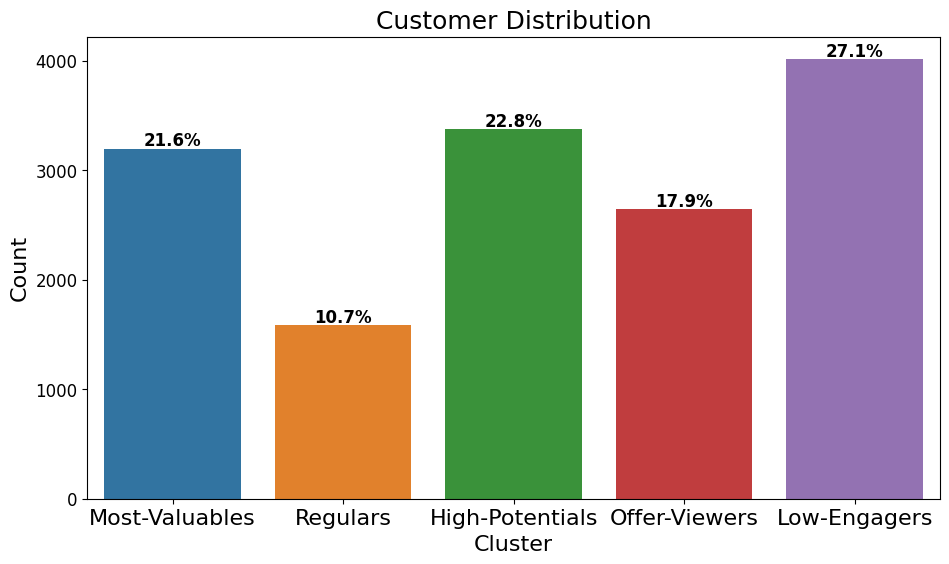

In [97]:
#Number of customers in each segment
p = customer_behavior_profile.value_counts('cluster').reindex(importance_ranking)
cluster_pct = list((p/p.sum() * 100).round(2))
cluster_names = ['Most-Valuables', 'Regulars', 'High-Potentials', 'Offer-Viewers', 'Low-Engagers']
fig = plt.figure(figsize = (11,6))
ax = sns.barplot(x = p.index.values, y = p.values, order = importance_ranking)
patches = ax.patches
for i in range(len(p)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height() + 25
    ax.annotate(text = '{:.1f}%'.format(cluster_pct[i]), xy = (x, y), ha = 'center',
               fontsize = 12, weight = 'bold')

plt.title('Customer Distribution', fontsize = 18)
plt.xticks(ticks = np.arange(len(p)), labels = cluster_names, fontsize = 16)
plt.yticks(ticks = np.arange(0, 5000, 1000), fontsize = 12)
plt.xlabel('Cluster', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.show()

In [98]:
#Average demographics of each segment
segment_means = customer_behavior_profile.groupby('cluster').agg({'age': 'mean', 'income': 'mean'}).reindex(importance_ranking)
segment_means.index = ['Most-Valuables', 'Regulars', 'High-Potentials', 'Offer-Viewers', 'Low-Engagers']
segment_means.round(2).head()

,age,income
Most-Valuables,56.10,71735.46
Regulars,47.33,48782.83
High-Potentials,57.93,74534.66
Offer-Viewers,55.53,65218.95
Low-Engagers,52.10,59371.08


Observations

*   The High-Potentials segement are highest in both age and income.The Most-Valuables segement comes right after.
*   The Regelars segement are the lowest in both age and income


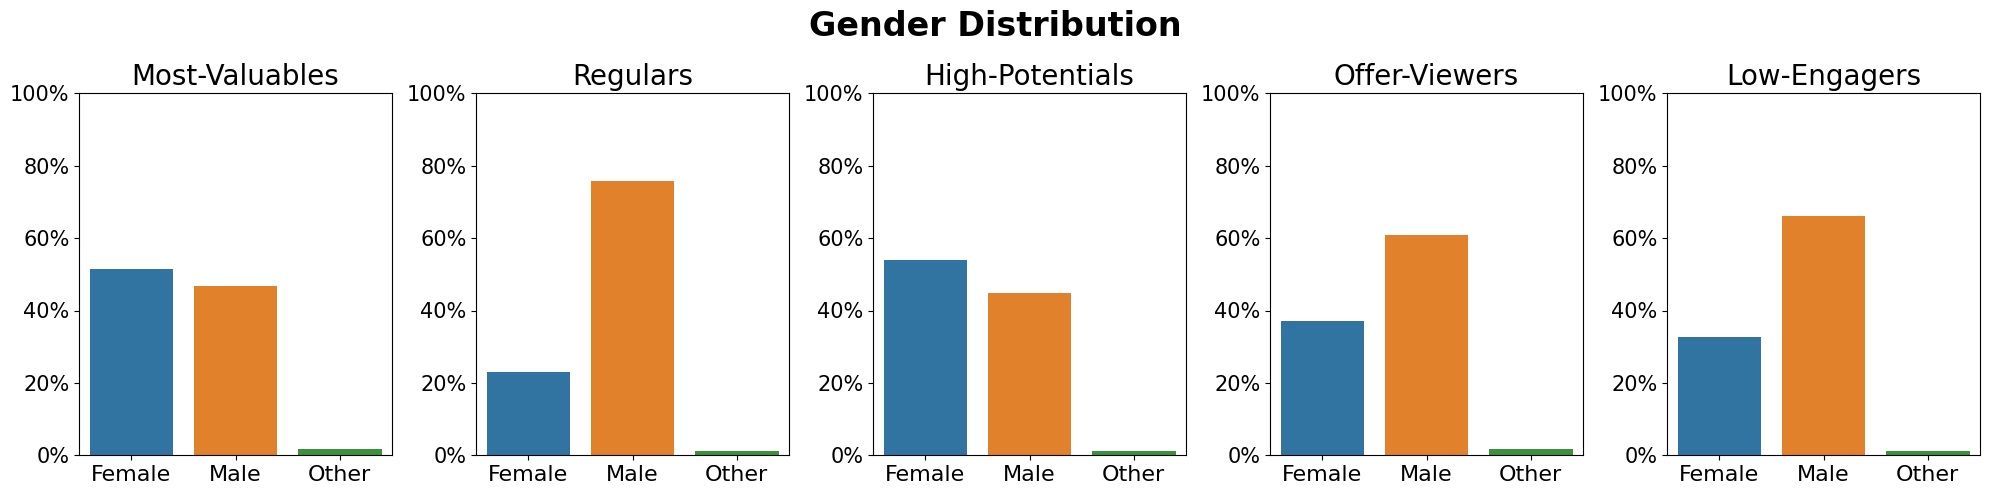

In [99]:
#Gender distribution in each segment
num_clusters = customer_behavior_profile['cluster'].nunique()
fig, axs = plt.subplots(1, num_clusters, figsize = (20,5))
cluster_names = ['Most-Valuables', 'Regulars', 'High-Potentials', 'Offer-Viewers', 'Low-Engagers']
xticklabels = ['Female', 'Male', 'Other']
yticks = np.arange(0,1.2, 0.2)
yticklabels = [str(n) + '%' for n in (yticks * 100).astype(int)]
for i in np.arange(num_clusters):
    p = customer_behavior_profile[customer_behavior_profile['cluster'] == importance_ranking[i]].value_counts('gender').sort_index()
    sns.barplot(x = p.index.values, y = p.values / p.sum(), ax = axs[i])
    axs[i].set_title(cluster_names[i], fontsize = 20)
    axs[i].set_xticklabels(xticklabels, fontsize = 16)
    axs[i].set_yticks(yticks); axs[i].set_yticklabels(yticklabels, fontsize = 15)

plt.suptitle('Gender Distribution', fontsize = 24, fontweight = 'bold')
plt.tight_layout()
plt.show()

Age distribution in each segment

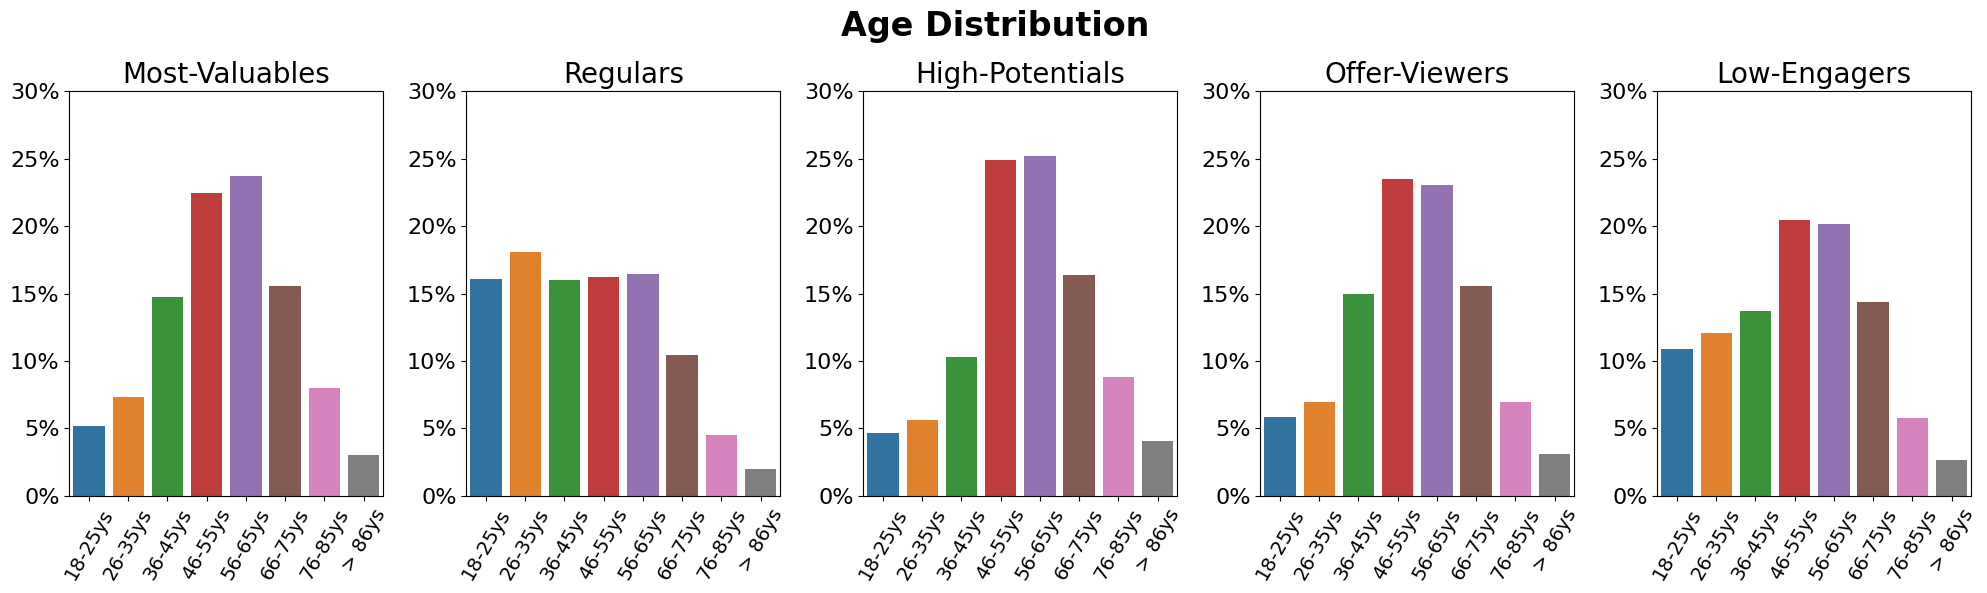

In [100]:
fig, axs = plt.subplots(1, num_clusters, figsize = (20,6))
cluster_names = ['Most-Valuables', 'Regulars', 'High-Potentials', 'Offer-Viewers', 'Low-Engagers']
age_group_list = ['18-25ys', '26-35ys', '36-45ys', '46-55ys', '56-65ys', '66-75ys', '76-85ys', '> 86ys']
yticks = np.arange(0,0.35, 0.05)
ytick_labels = [str(n) + '%' for n in (yticks * 100).astype(int)]

for i in np.arange(num_clusters):
    p = customer_behavior_profile[customer_behavior_profile['cluster'] == importance_ranking[i]].value_counts('age_group').sort_index()
    sns.barplot(x = p.index.values, y = p.values / p.sum(), ax = axs[i])
    axs[i].set_title(cluster_names[i], fontsize = 20)
    axs[i].set_yticks(yticks); axs[i].set_yticklabels(ytick_labels, fontsize = 16)
    axs[i].set_xticklabels(age_group_list, rotation=60, fontsize = 14)

plt.suptitle('Age Distribution', fontsize = 24, fontweight = 'bold')
plt.tight_layout()
plt.show()

Income distribution in each segment

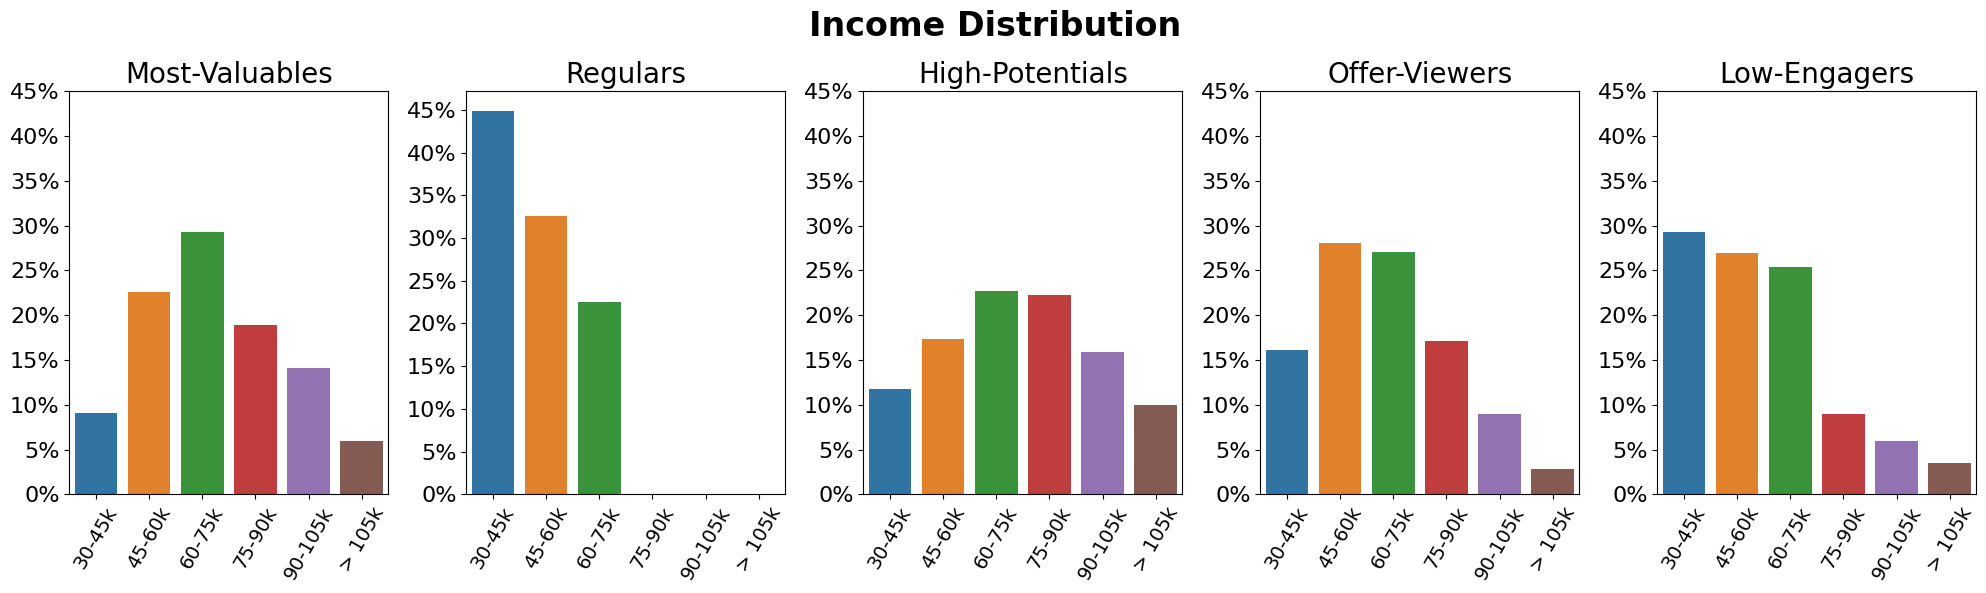

In [101]:
fig, axs = plt.subplots(1, num_clusters, figsize = (20,6))
cluster_names = ['Most-Valuables', 'Regulars', 'High-Potentials', 'Offer-Viewers', 'Low-Engagers']
income_group_list = ['30-45k', '45-60k', '60-75k', '75-90k', '90-105k', '> 105k']
yticks = np.arange(0,0.5, 0.05)
ytick_labels = [str(n) + '%' for n in (yticks * 100).astype(int)]
for i in np.arange(num_clusters):
    p = customer_behavior_profile[customer_behavior_profile['cluster'] == importance_ranking[i]].value_counts('income_group').sort_index()
    sns.barplot(x = p.index.values, y = p.values / p.sum(), ax = axs[i])
    axs[i].set_title(cluster_names[i], fontsize = 20)
    axs[i].set_yticks(yticks); axs[i].set_yticklabels(ytick_labels, fontsize = 16)
    axs[i].set_xticklabels(income_group_list[: p.shape[0]], rotation=60, fontsize = 14)

plt.suptitle('Income Distribution', fontsize = 24, fontweight = 'bold')
plt.tight_layout()
plt.show()

Summary on demographics of each segment

Most Valuable Customers between 36-75 years old, having an income between 45-90k. Slightly more females than male.

Regulars Lower-Income males evenly distributed within 18-65 years old, having an income between 30-75k.

High Potentials between 46-75 years old. Income 60-90k. Similar number of females and males.

Offer-Viewers age and income are both rougly normaly distributed. Slightly more males than female.

Low Engager Mostly males on the lower half of the income spectrum.

ANALYSIS OF OFFERS, EVENTS AND CUSTOMERS

How customer attributes affected their response to offers?

In [102]:
# Convert the 'channels' column to a string representation
Event_data['channels_str'] = Event_data['channels'].astype(str)

# Add column `channel_alias` for easier referencing
Event_data['channel_alias'] = Event_data['channels_str'].map({
    "['web', 'email', 'mobile', 'social']": 1,
    "['email', 'mobile', 'social']": 2,
    "['web', 'email', 'mobile']": 3,
    # Add more mappings as needed
})

# Drop the temporary 'channels_str' column if you don't need it
Event_data = Event_data.drop('channels_str', axis=1)

In [103]:
# Merge
event_offer_customer = pd.merge(profile, Event_data, left_on = 'id', right_on = 'customer_id').drop('id', axis = 1)

# Drop unwanted columns
event_offer_customer.drop(['channels', 'offer_id'], axis = 1, inplace = True)

# Reorder columns
col_names = ['gender_x', 'age_x', 'became_member_on_x', 'income_x', 'age_group_x', 'income_group_y', 'customer_id',
             'event', 'offer_alias', 'channel_alias', 'offer_type',
             'reward_transaction', 'difficulty', 'duration',
             'time'
       ]
event_offer_customer = event_offer_customer[col_names]
event_offer_customer.head(3)

,gender_x,age_x,became_member_on_x,income_x,age_group_x,income_group_y,customer_id,event,offer_alias,channel_alias,offer_type,reward_transaction,difficulty,duration,time
0,F,55,20170715,112000.0,46-55ys,> 105k,0610b486422d4921ae7d2bf64640c50b,offer received,A,3.0,bogo,5.0,5.0,7.0,408
1,F,55,20170715,112000.0,46-55ys,> 105k,0610b486422d4921ae7d2bf64640c50b,offer received,D,3.0,informational,0.0,0.0,4.0,504
2,F,55,20170715,112000.0,46-55ys,> 105k,0610b486422d4921ae7d2bf64640c50b,offer completed,A,3.0,bogo,5.0,5.0,7.0,528


How gender influenced cutomer response to offers?

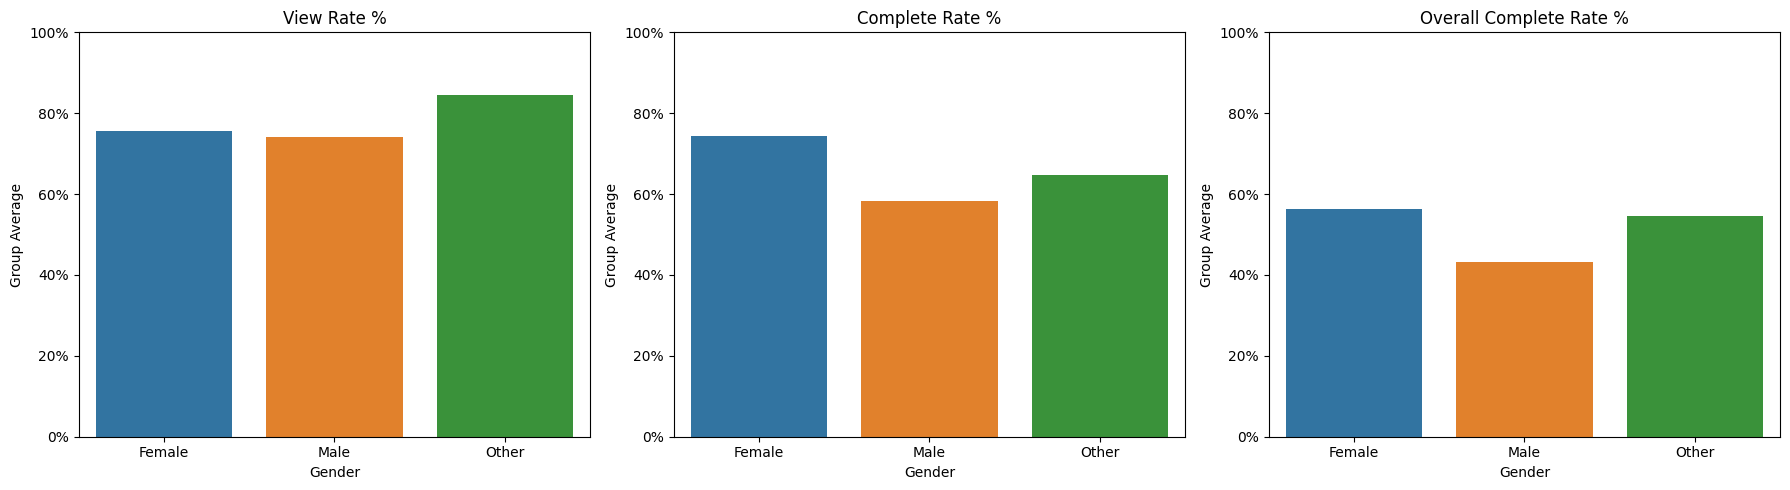

In [104]:
# Group data
grouped_by_gender = event_offer_customer.groupby(['gender_x', 'event']).agg({'time': 'count'})
gender_list = ['F', 'M', 'O']

# Calculate view rate
view_rate = []
for i in range(len(gender_list)):
    view_rate.append(grouped_by_gender.loc[(gender_list[i], 'offer viewed')] / grouped_by_gender.loc[(gender_list[i], 'offer received')])
view_rate = [x[0] for x in view_rate]

# Calculate complete rate
complete_rate = []
for i in range(len(gender_list)):
    complete_rate.append(grouped_by_gender.loc[(gender_list[i], 'offer completed')] / grouped_by_gender.loc[(gender_list[i], 'offer viewed')])
complete_rate = [x[0] for x in complete_rate]

# Calculate overall complete rate
overall_complete_rate = []
for i in range(len(gender_list)):
    overall_complete_rate.append(grouped_by_gender.loc[(gender_list[i], 'offer completed')] / grouped_by_gender.loc[(gender_list[i], 'offer received')])
overall_complete_rate = [x[0] for x in overall_complete_rate]

# Visualize
xticks = np.arange(len(gender_list))
xticklabels = ['Female', 'Male', 'Other']
yticks = np.arange(0,1.2, 0.2)
ytick_labels = [str(n) + '%' for n in (yticks * 100).astype(int)]

fig, axs = plt.subplots(1, 3, figsize = (18, 5))
sns.barplot(x = xticks, y = view_rate, ax = axs[0])
sns.barplot(x = xticks, y = complete_rate, ax = axs[1])
sns.barplot(x = xticks, y = overall_complete_rate, ax = axs[2])
axs[0].set_title('View Rate %'); axs[0].set_xlabel('Gender'); axs[0].set_ylabel('Group Average')
axs[0].set_xticklabels(xticklabels); axs[0].set_yticks(yticks); axs[0].set_yticklabels(ytick_labels)
axs[1].set_title('Complete Rate %'); axs[1].set_xlabel('Gender'); axs[1].set_ylabel('Group Average')
axs[1].set_xticklabels(xticklabels); axs[1].set_yticks(yticks); axs[1].set_yticklabels(ytick_labels)
axs[2].set_title('Overall Complete Rate %'); axs[2].set_xlabel('Gender'); axs[2].set_ylabel('Group Average')
axs[2].set_xticklabels(xticklabels); axs[2].set_yticks(yticks); axs[2].set_yticklabels(ytick_labels)

plt.tight_layout()
plt.show()

Observations

View Rate: Customers of other genders had the highest view rate (84.4%). Female customers came second with a slightly higher view rate (75.7%) than male customers (74.2%).

Completion Rate: Having viewed the offers, female customers were most likely to complete them, presenting the highest completion rate of 74.5%. This is followed by customers of other gender with a completion rate of 64.8%. Male customers were the least likely to complete offers with a completion rate of 58.2%.

Overall completion rate: Overall, female customers completed the highest percentage (56.4%) of offers they received, closely followed by customers of other genders (54.7%). Male customers had the lowest offer completion rate (43.2%).

Summary
Overall, female cutomers were more likely to complete offers they received than other genders, having an overall compeltion rate of 56.4%. Especially, there was a very high chance (74.5%) for them to complete an offer as long as they have viewed it. Therefore, increasing view rate of female customers will effectively increase the overall compeltion rate. Male customers are the least responsive to offers, having the lowest rates.

How age influenced cutomer response to offers?

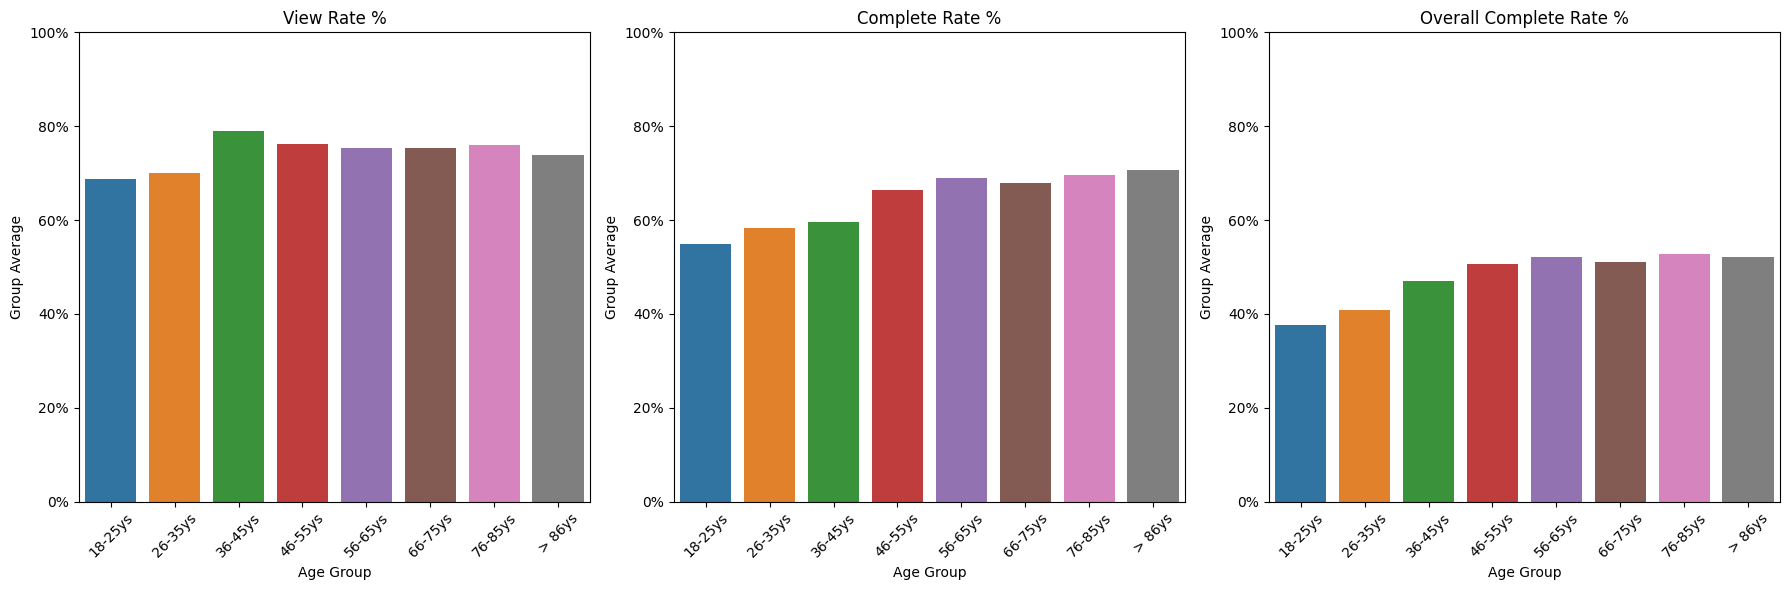

In [105]:
# Group data
grouped_by_age = event_offer_customer.groupby(['age_group_x', 'event']).agg({'time': 'count'})
age_group_list = ['18-25ys', '26-35ys', '36-45ys', '46-55ys', '56-65ys', '66-75ys', '76-85ys', '> 86ys']

# Calculate view rate
view_rate = []
for i in range(len(age_group_list)):
    view_rate.append(grouped_by_age.loc[(age_group_list[i], 'offer viewed')] / grouped_by_age.loc[(age_group_list[i], 'offer received')])
view_rate = [x[0] for x in view_rate]

# Calculate complete rate
complete_rate = []
for i in range(len(age_group_list)):
    complete_rate.append(grouped_by_age.loc[(age_group_list[i], 'offer completed')] / grouped_by_age.loc[(age_group_list[i], 'offer viewed')])
complete_rate = [x[0] for x in complete_rate]

# Calculate overall complete rate
overall_complete_rate = []
for i in range(len(age_group_list)):
    overall_complete_rate.append(grouped_by_age.loc[(age_group_list[i], 'offer completed')] / grouped_by_age.loc[(age_group_list[i], 'offer received')])
overall_complete_rate = [x[0] for x in overall_complete_rate]

# Visualize
xticks = np.arange(len(age_group_list))
yticks = np.arange(0,1.2, 0.2)
ytick_labels = [str(n) + '%' for n in (yticks * 100).astype(int)]

fig, axs = plt.subplots(1, 3, figsize = (18, 6))
sns.barplot(x = np.arange(len(age_group_list)), y = view_rate, ax = axs[0])
sns.barplot(x = np.arange(len(age_group_list)), y = complete_rate, ax = axs[1])
sns.barplot(x = np.arange(len(age_group_list)), y = overall_complete_rate, ax = axs[2])
axs[0].set_title('View Rate %'); axs[0].set_xlabel('Age Group'); axs[0].set_ylabel('Group Average')
axs[0].set_xticklabels(age_group_list, rotation=45); axs[0].set_yticks(yticks); axs[0].set_yticklabels(ytick_labels)
axs[1].set_title('Complete Rate %'); axs[1].set_xlabel('Age Group'); axs[1].set_ylabel('Group Average')
axs[1].set_xticklabels(age_group_list, rotation=45); axs[1].set_yticks(yticks); axs[1].set_yticklabels(ytick_labels)
axs[2].set_title('Overall Complete Rate %'); axs[2].set_xlabel('Age Group'); axs[2].set_ylabel('Group Average')
axs[2].set_xticklabels(age_group_list, rotation=45); axs[2].set_yticks(yticks); axs[2].set_yticklabels(ytick_labels)

plt.tight_layout()
plt.show()

Observations

Trends accross different age groups are weak. This means that age is not a very important factor that affects cutomer's response to offers.
In general, younger custerms were less responsive to offers then elder ones.
There is a gentle increase in overall completion rate % with age for customers between 18 - 65 years old, from 38% to 52%. After 65 years old, the overall completion rate keeps almost unchanged with change in age.

How income influenced cutomer response to offers

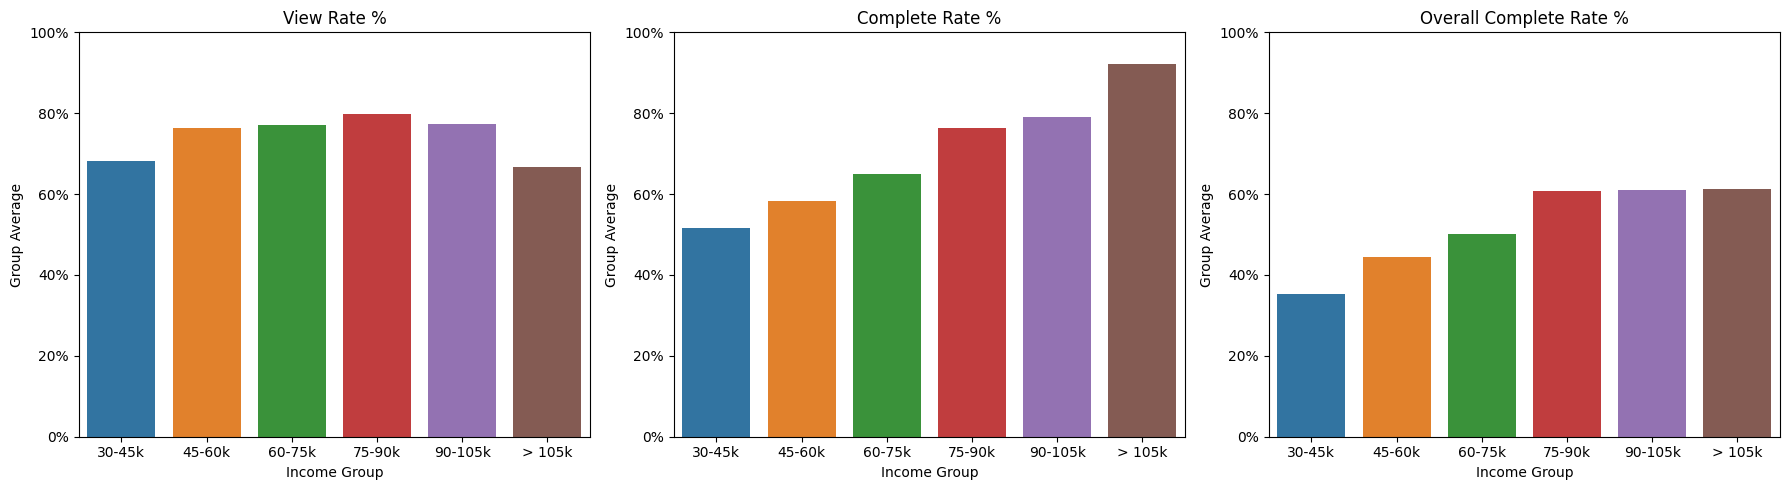

In [106]:
# Group data
grouped_by_income = event_offer_customer.groupby(['income_group_y', 'event']).agg({'time': 'count'})
income_group_list = ['30-45k', '45-60k', '60-75k', '75-90k', '90-105k', '> 105k']

# Calculate view rate
view_rate = []
for i in range(len(income_group_list)):
    view_rate.append(grouped_by_income.loc[(income_group_list[i], 'offer viewed')] / grouped_by_income.loc[(income_group_list[i], 'offer received')])
view_rate = [x[0] for x in view_rate]

# Calculate complete rate
complete_rate = []
for i in range(len(income_group_list)):
    complete_rate.append(grouped_by_income.loc[(income_group_list[i], 'offer completed')] / grouped_by_income.loc[(income_group_list[i], 'offer viewed')])
complete_rate = [x[0] for x in complete_rate]

# Calculate overall complete rate
overall_complete_rate = []
for i in range(len(income_group_list)):
    overall_complete_rate.append(grouped_by_income.loc[(income_group_list[i], 'offer completed')] / grouped_by_income.loc[(income_group_list[i], 'offer received')])
overall_complete_rate = [x[0] for x in overall_complete_rate]

# Visualize
yticks = np.arange(0,1.2, 0.2)
ytick_labels = [str(n) + '%' for n in (yticks * 100).astype(int)]

fig, axs = plt.subplots(1, 3, figsize = (18, 5))
sns.barplot(x = np.arange(len(income_group_list)), y = view_rate, ax = axs[0])
sns.barplot(x = np.arange(len(income_group_list)), y = complete_rate, ax = axs[1])
sns.barplot(x = np.arange(len(income_group_list)), y = overall_complete_rate, ax = axs[2])
axs[0].set_title('View Rate %'); axs[0].set_xlabel('Income Group'); axs[0].set_ylabel('Group Average')
axs[0].set_xticklabels(income_group_list); axs[0].set_yticks(yticks); axs[0].set_yticklabels(ytick_labels)
axs[1].set_title('Complete Rate %'); axs[1].set_xlabel('Income Group'); axs[1].set_ylabel('Group Average')
axs[1].set_xticklabels(income_group_list); axs[1].set_yticks(yticks); axs[1].set_yticklabels(ytick_labels)
axs[2].set_title('Overall Complete Rate %'); axs[2].set_xlabel('Income Group'); axs[2].set_ylabel('Group Average')
axs[2].set_xticklabels(income_group_list); axs[2].set_yticks(yticks); axs[2].set_yticklabels(ytick_labels)

plt.tight_layout()
plt.show()

How offer attributes affected customer behavior for different cutomer groups?

How promotion channel affected view rate % in different age_group?

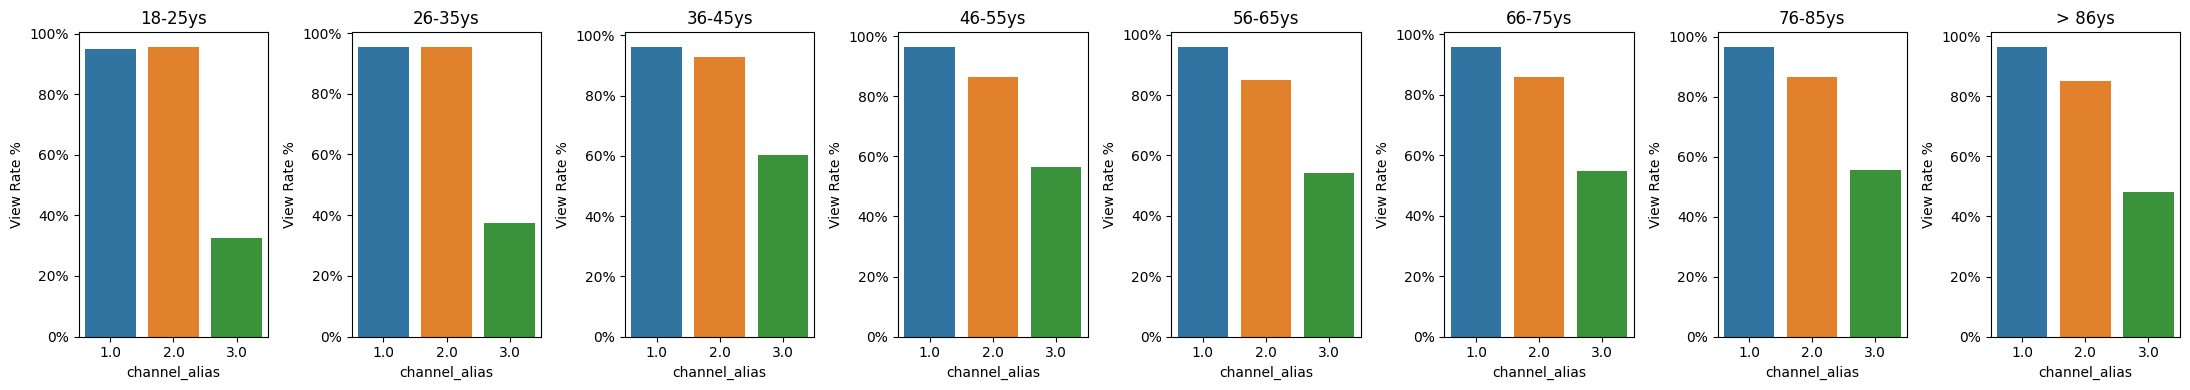

In [107]:
# Group data
grouped_by_age = event_offer_customer.groupby(['age_group_x', 'event','channel_alias']).agg({'time': 'count'})

# Visualize
age_group_list = ['18-25ys', '26-35ys', '36-45ys', '46-55ys', '56-65ys', '66-75ys', '76-85ys', '> 86ys']
yticks = np.arange(0,1.2, 0.2)
ytick_labels = [str(n) + '%' for n in (yticks * 100).astype(int)]

fig, axs = plt.subplots(1, len(age_group_list), figsize = (22,4))
for i in range(len(age_group_list)):
    p = (grouped_by_age.loc[(age_group_list[i], 'offer viewed')] / grouped_by_age.loc[(age_group_list[i], 'offer received')]).sort_index()
    p.rename(columns = {'time': 'Percentage %'}, inplace = True)
    p.reset_index(inplace = True)

    sns.barplot(data = p, x = 'channel_alias', y = 'Percentage %', ax = axs[i])
    axs[i].set_yticks(yticks)
    axs[i].set_yticklabels(ytick_labels)
    axs[i].set_title(age_group_list[i])
    axs[i].set_ylabel('View Rate %')

plt.tight_layout()
plt.show()

How promotion channel affected view rate % in different gender?

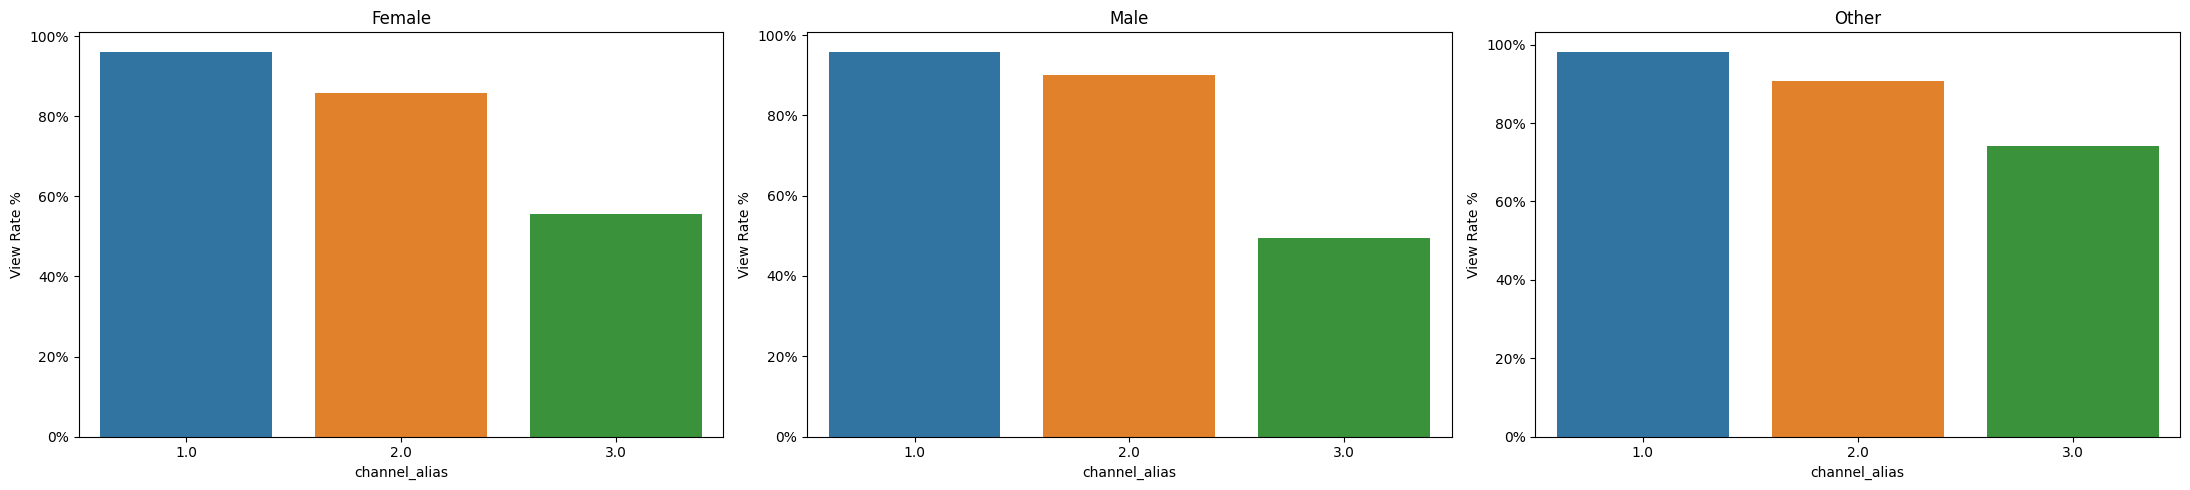

In [108]:
# Group data
grouped_by_gender = event_offer_customer.groupby(['gender_x', 'event','channel_alias']).agg({'time': 'count'})

# Visualize
gender_list = ['F', 'M', 'O']
yticks = np.arange(0,1.2, 0.2)
ytick_labels = [str(n) + '%' for n in (yticks * 100).astype(int)]
title_list = ['Female', 'Male', 'Other']

fig, axs = plt.subplots(1, len(gender_list), figsize = (22,5))
for i in range(len(gender_list)):
    p = (grouped_by_gender.loc[(gender_list[i], 'offer viewed')] / grouped_by_gender.loc[(gender_list[i], 'offer received')]).sort_index()
    p.rename(columns = {'time': 'Percentage %'}, inplace = True)
    p.reset_index(inplace = True)
    sns.barplot(data = p, x = 'channel_alias', y = 'Percentage %', ax = axs[i])
    axs[i].set_yticks(yticks)
    axs[i].set_yticklabels(ytick_labels)
    axs[i].set_title(title_list[i])
    axs[i].set_ylabel('View Rate %')

plt.tight_layout()
plt.show()

How promotion channel affected view rate % in different income_group?

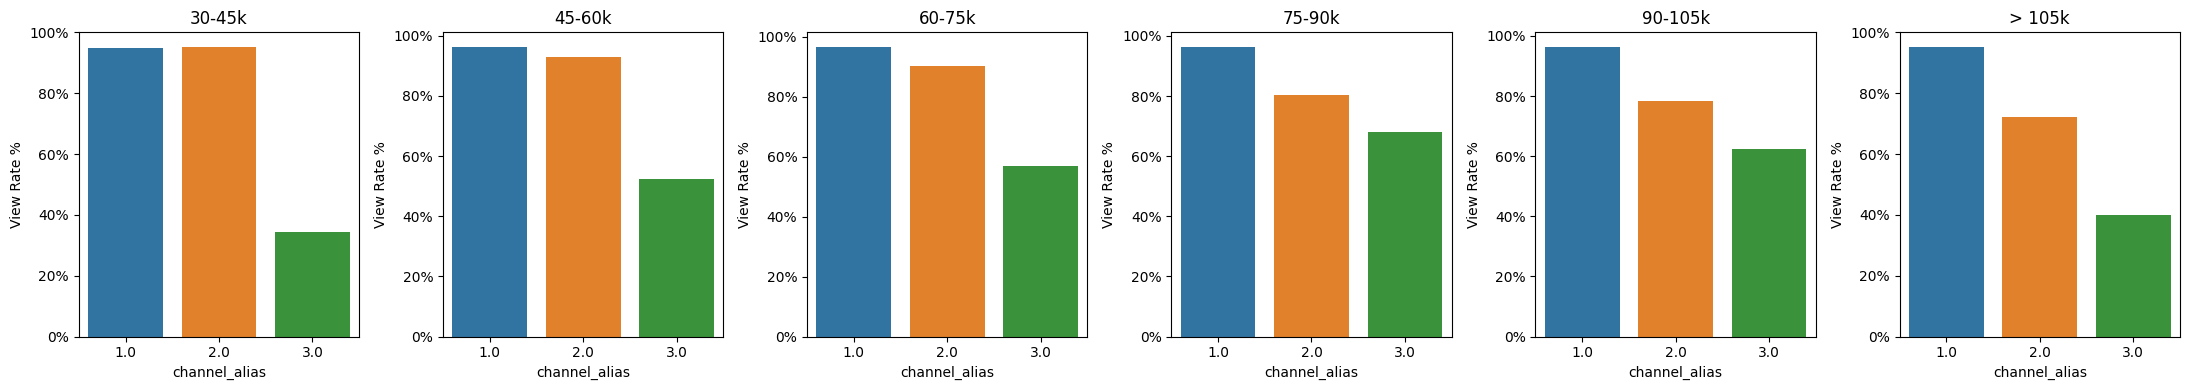

In [112]:
# Group data
grouped_by_income = event_offer_customer.groupby(['income_group_y', 'event','channel_alias']).agg({'time': 'count'})

# Visualize
income_group_list = ['30-45k', '45-60k', '60-75k', '75-90k', '90-105k', '> 105k']
yticks = np.arange(0,1.2, 0.2)
ytick_labels = [str(n) + '%' for n in (yticks * 100).astype(int)]

fig, axs = plt.subplots(1, len(income_group_list), figsize = (22,4))
for i in range(len(income_group_list)):
    p = (grouped_by_income.loc[(income_group_list[i], 'offer viewed')] / grouped_by_income.loc[(income_group_list[i], 'offer received')]).sort_index()
    p.rename(columns = {'time': 'Percentage %'}, inplace = True)
    p.reset_index(inplace = True)

    sns.barplot(data = p, x = 'channel_alias', y = 'Percentage %', ax = axs[i])
    axs[i].set_yticks(yticks)
    axs[i].set_yticklabels(ytick_labels)
    axs[i].set_title(income_group_list[i])
    axs[i].set_ylabel('View Rate %')

plt.tight_layout()
plt.show()

How offer_type affected the completion rate % for different age_group?

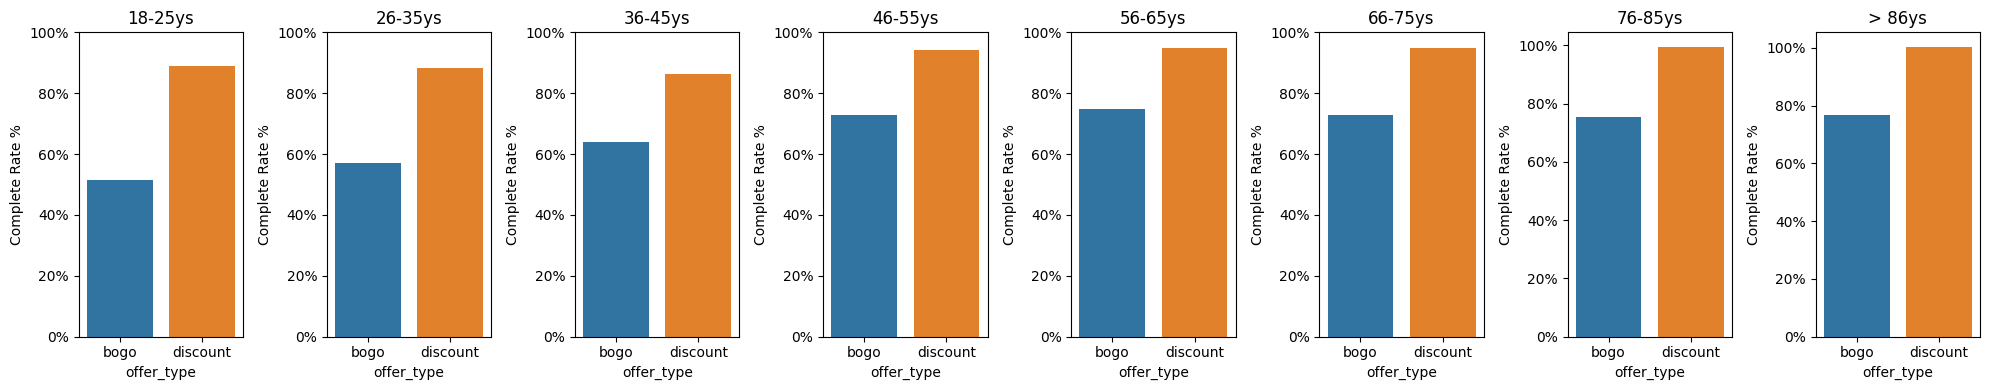

In [113]:
# Group data
grouped_by_age = event_offer_customer.groupby(['age_group_x', 'event','offer_type']).agg({'time': 'count'})

# Visualize
age_group_list = ['18-25ys', '26-35ys', '36-45ys', '46-55ys', '56-65ys', '66-75ys', '76-85ys', '> 86ys']
yticks = np.arange(0,1.2, 0.2)
ytick_labels = [str(n) + '%' for n in (yticks * 100).astype(int)]

fig, axs = plt.subplots(1, len(age_group_list), figsize = (20,4))
for i in range(len(age_group_list)):
    p = (grouped_by_age.loc[(age_group_list[i], 'offer completed')] / grouped_by_age.loc[(age_group_list[i], 'offer viewed')]).sort_index()
    p.rename(columns = {'time': 'Percentage %'}, inplace = True)
    p.reset_index(inplace = True)

    sns.barplot(data = p.iloc[0:2,:], x = 'offer_type', y = 'Percentage %', ax = axs[i])
    axs[i].set_yticks(yticks)
    axs[i].set_yticklabels(ytick_labels)
    axs[i].set_title(age_group_list[i])
    axs[i].set_ylabel('Complete Rate %')

plt.tight_layout()
plt.show()

How offer_type affected the completion rate % for different gender?

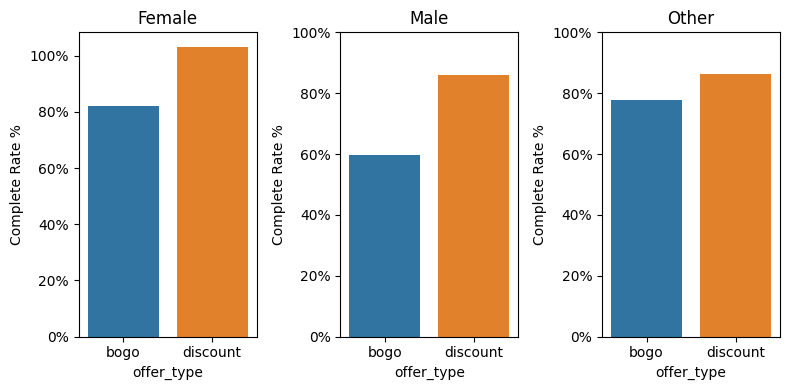

In [114]:
# Group data
grouped_by_gender = event_offer_customer.groupby(['gender_x', 'event','offer_type']).agg({'time': 'count'})

# Visualize
gender_list = ['F', 'M', 'O']
yticks = np.arange(0,1.2, 0.2)
ytick_labels = [str(n) + '%' for n in (yticks * 100).astype(int)]
title_list = ['Female', 'Male', 'Other']

fig, axs = plt.subplots(1, len(gender_list), figsize = (8,4))
for i in range(len(gender_list)):
    p = (grouped_by_gender.loc[(gender_list[i], 'offer completed')] / grouped_by_gender.loc[(gender_list[i], 'offer viewed')]).sort_index()
    p.rename(columns = {'time': 'Percentage %'}, inplace = True)
    p.reset_index(inplace = True)

    sns.barplot(data = p.iloc[0:2,:], x = 'offer_type', y = 'Percentage %', ax = axs[i])
    axs[i].set_yticks(yticks)
    axs[i].set_yticklabels(ytick_labels)
    axs[i].set_title(title_list[i])
    axs[i].set_ylabel('Complete Rate %')

plt.tight_layout()
plt.show()

How offer_type affected the completion rate % for different income_group?

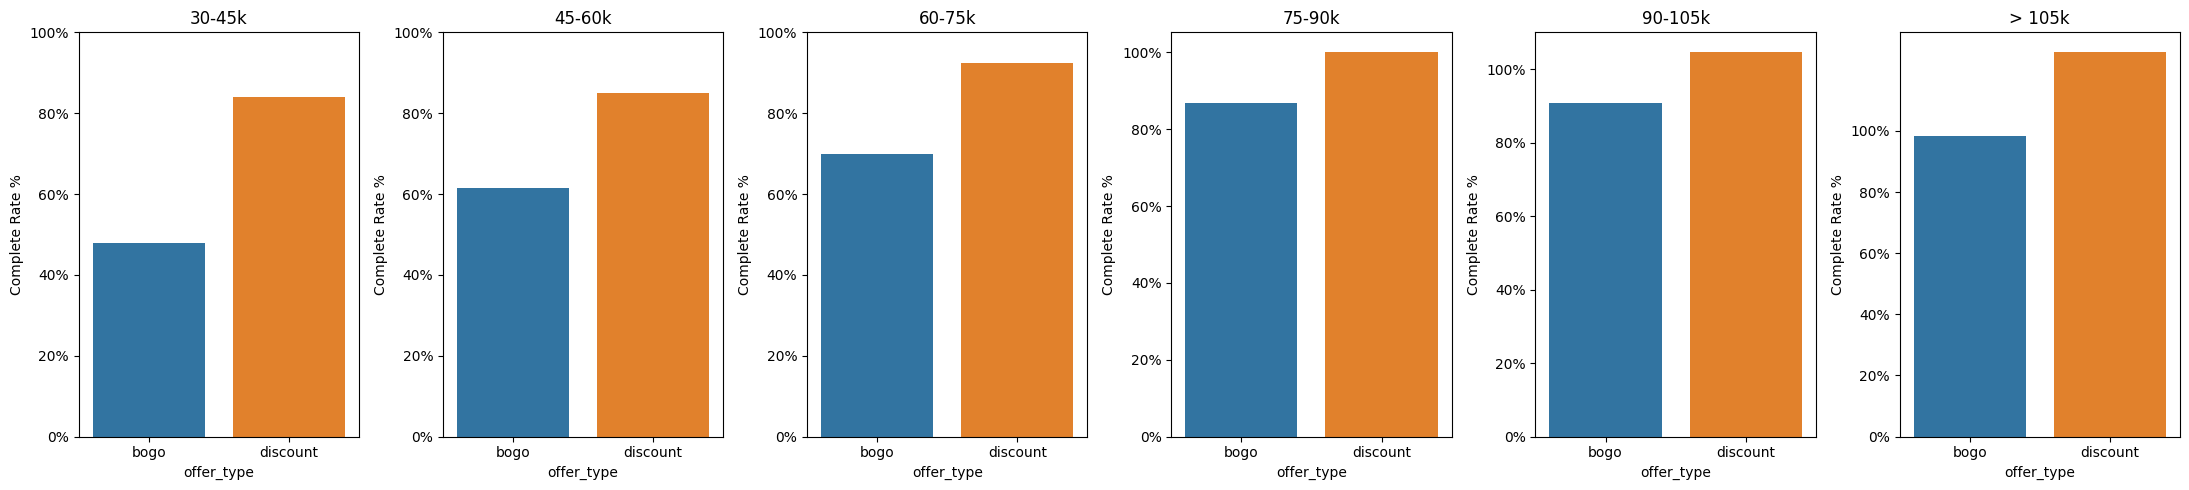

In [116]:
# Group data
grouped_by_income = event_offer_customer.groupby(['income_group_y', 'event','offer_type']).agg({'time': 'count'})

# Visualize
income_group_list = ['30-45k', '45-60k', '60-75k', '75-90k', '90-105k', '> 105k']
yticks = np.arange(0,1.2, 0.2)
ytick_labels = [str(n) + '%' for n in (yticks * 100).astype(int)]

fig, axs = plt.subplots(1, len(income_group_list), figsize = (22,5))
for i in range(len(income_group_list)):
    p = (grouped_by_income.loc[(income_group_list[i], 'offer completed')] / grouped_by_income.loc[(income_group_list[i], 'offer viewed')]).sort_index()
    p.rename(columns = {'time': 'Percentage %'}, inplace = True)
    p.reset_index(inplace = True)

    sns.barplot(data = p.iloc[0:2,:], x = 'offer_type', y = 'Percentage %', ax = axs[i])
    axs[i].set_yticks(yticks)
    axs[i].set_yticklabels(ytick_labels)
    axs[i].set_title(income_group_list[i])
    axs[i].set_ylabel('Complete Rate %')

plt.tight_layout()
plt.show()